In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../../Water_Quality.csv.zip', compression='zip')

# Exploring the Data

In [103]:
# List of continuous and categorical features
continuous_features = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 
                       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 
                       'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature']
categorical_features = ['Color', 'Source', 'Month', 'Day', 'Time of Day', 'Target']

# Initialize a list to store the analysis results
details = []

# Analyze continuous features for min and max values
for feature in continuous_features:
    min_value = df[feature].min()
    max_value = df[feature].max()
    details.append({
        'Name': feature,
        'Data Type': 'Numerical',
        'Scale': 'Ratio',
        'Domain': f"{min_value} - {max_value}"
    })

# Analyze categorical features for all unique values
for feature in categorical_features:
    # Get all unique values as a list and then join them into a string for the 'Domain' field
    unique_values_list = df[feature].dropna().unique()
    unique_values_str = ', '.join(map(str, unique_values_list))
    details.append({
        'Name': feature,
        'Data Type': 'Categorical',
        'Scale': 'Nominal' if feature not in ['Month', 'Day', 'Time of Day'] else 'Ordinal',
        'Domain': unique_values_str
    })

# Convert the analysis results into a DataFrame
details_df = pd.DataFrame(details)

# Display the DataFrame
print(details_df)


                      Name    Data Type    Scale  \
0                       pH    Numerical    Ratio   
1                     Iron    Numerical    Ratio   
2                  Nitrate    Numerical    Ratio   
3                 Chloride    Numerical    Ratio   
4                     Lead    Numerical    Ratio   
5                     Zinc    Numerical    Ratio   
6                Turbidity    Numerical    Ratio   
7                 Fluoride    Numerical    Ratio   
8                   Copper    Numerical    Ratio   
9                     Odor    Numerical    Ratio   
10                 Sulfate    Numerical    Ratio   
11            Conductivity    Numerical    Ratio   
12                Chlorine    Numerical    Ratio   
13               Manganese    Numerical    Ratio   
14  Total Dissolved Solids    Numerical    Ratio   
15       Water Temperature    Numerical    Ratio   
16         Air Temperature    Numerical    Ratio   
17                   Color  Categorical  Nominal   
18          

# Data Quality Reports

### Create a Data Quality Report for Continuous Features

In [104]:
# List of continuous features
continuous_features_list = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 
                            'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 
                            'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature']

# Initialize an empty DataFrame for the data quality report
data_quality_records = []

# Calculate statistics for each continuous feature
for feature in continuous_features_list:
    col_data = df[feature]
    record = {
        'Feature': feature,
        'Count': col_data.count(),
        '% Missing': (col_data.isnull().sum() / len(col_data)) * 100,
        'Cardinality': col_data.nunique(),
        'Min': col_data.min(),
        'Q1': col_data.quantile(0.25),
        'Median': col_data.median(),
        'Q3': col_data.quantile(0.75),
        'Max': col_data.max(),
        'Mean': col_data.mean(),
        'Std Dev': col_data.std(),
    }
    data_quality_records.append(record)

# Create the DataFrame from the list of dictionaries
data_quality_report_continuous = pd.DataFrame(data_quality_records)

# Format the specified columns to round to 2 decimal places
columns_to_format = ['% Missing', 'Min', 'Q1', 'Median', 'Q3', 'Max', 'Mean', 'Std Dev']
data_quality_report_continuous[columns_to_format] = data_quality_report_continuous[columns_to_format].apply(lambda x: x.round(2))

# Save the Data Quality Report to a CSV file
data_quality_report_continuous.to_csv('quality_reports/continuous_features_report.csv', index=False)

# Display the Data Quality Report for Continuous Features
print(data_quality_report_continuous)


                   Feature    Count  % Missing  Cardinality    Min      Q1  \
0                       pH  1028344       1.93       996595   2.06    6.91   
1                     Iron  1041584       0.67       669099   0.00    0.00   
2                  Nitrate  1029880       1.78       998213   0.29    3.95   
3                 Chloride  1017741       2.94       986621  29.41  137.43   
4                     Lead  1043891       0.45       233165   0.00    0.00   
5                     Zinc  1020900       2.64       989688   0.00    0.41   
6                Turbidity  1039881       0.83       988790   0.00    0.04   
7                 Fluoride  1015357       3.17       984406   0.00    0.37   
8                   Copper  1013693       3.33       982372   0.00    0.13   
9                     Odor  1017243       2.99       986355   0.01    0.88   
10                 Sulfate  1014050       3.29       983313  11.94   97.46   
11            Conductivity  1019772       2.75       988666  13.

### Create a Data Quality Report for Categorical Features

In [105]:
# List of categorical features
categorical_features_list = ['Color', 'Source', 'Month', 'Day', 'Time of Day', 'Target']

# Initialize a list to store each row's dictionary
data_quality_records = []

# Calculate statistics for each categorical feature
for feature in categorical_features_list:
    col_data = df[feature].dropna()
    count = col_data.count()
    percent_missing = (df[feature].isnull().sum() / len(df[feature])) * 100
    cardinality = col_data.nunique()
    mode = col_data.mode()[0] if not col_data.mode().empty else 'N/A'
    mode_frequency = col_data.value_counts().iloc[0] if cardinality > 0 else 0
    mode_percentage = (mode_frequency / count * 100) if count > 0 else 0
    second_mode = col_data.value_counts().index[1] if cardinality > 1 else 'N/A'
    second_mode_frequency = col_data.value_counts().iloc[1] if cardinality > 1 else 0
    second_mode_percentage = (second_mode_frequency / count * 100) if count > 0 and cardinality > 1 else 0
    
    # Create a dictionary for each row and append it to the list
    data_quality_records.append({
        'Feature': feature,
        'Count': count,
        '% Missing': percent_missing,
        'Cardinality': cardinality,
        'Mode': mode,
        'Mode Freq.': mode_frequency,
        'Mode %': mode_percentage,
        '2nd Mode': second_mode,
        '2nd Mode Freq.': second_mode_frequency,
        '2nd Mode %': second_mode_percentage,
    })

# Convert the list of dictionaries to a DataFrame
data_quality_report_categorical = pd.DataFrame(data_quality_records)

# Format the specified columns to round to 2 decimal places
columns_to_format = ['% Missing', 'Mode %', '2nd Mode %']
data_quality_report_categorical[columns_to_format] = data_quality_report_categorical[columns_to_format].apply(lambda x: x.round(2))

# Save the Data Quality Report to a CSV file
data_quality_report_categorical.to_csv('quality_reports/categorical_features_report.csv', index=False)

# Display the Data Quality Report for Categorical Features
print(data_quality_report_categorical)


       Feature    Count  % Missing  Cardinality       Mode  Mode Freq.  \
0        Color  1047594       0.09            5  Colorless      326033   
1       Source  1033040       1.48            8       Well      129654   
2        Month  1031654       1.61           12    January       88217   
3          Day  1031026       1.67           31       25.0       34192   
4  Time of Day  1028214       1.94           24        0.0       43267   
5       Target  1048575       0.00            2          0      807841   

   Mode %        2nd Mode  2nd Mode Freq.  2nd Mode % Notes  
0   31.12  Near Colorless          325799       31.10        
1   12.55         Aquifer          129609       12.55        
2    8.55          August           87855        8.52        
3    3.32            10.0           34168        3.31        
4    4.21             5.0           43124        4.19        
5   77.04               1          240734       22.96        


# Visualizing Features

### Visualizing Continuous Features

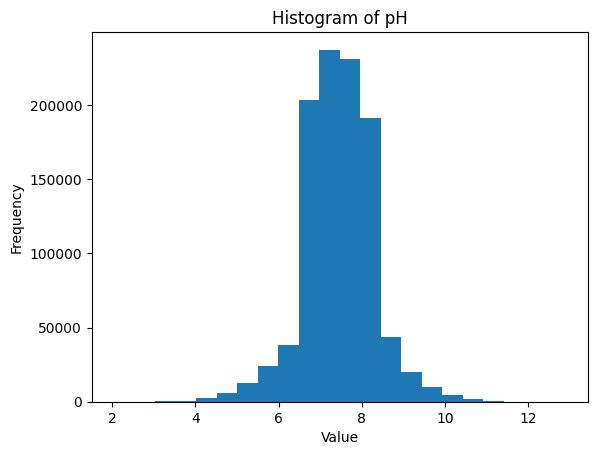

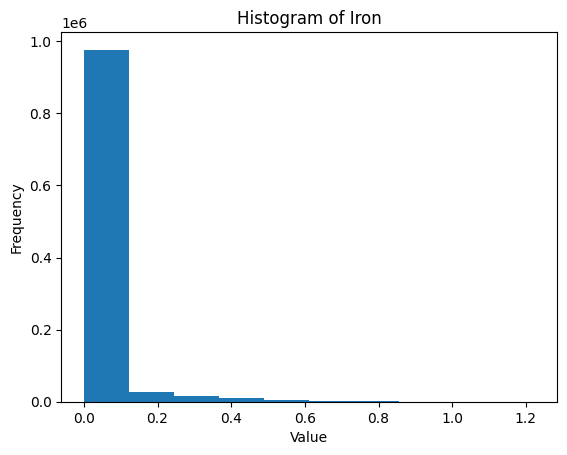

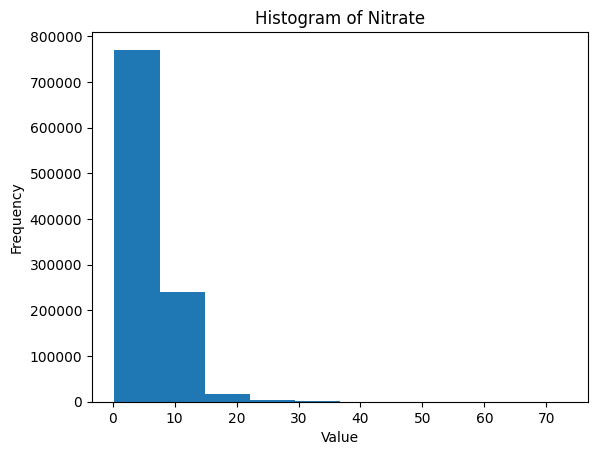

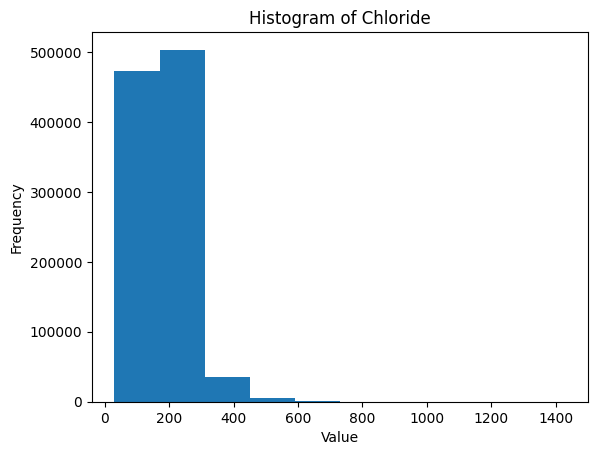

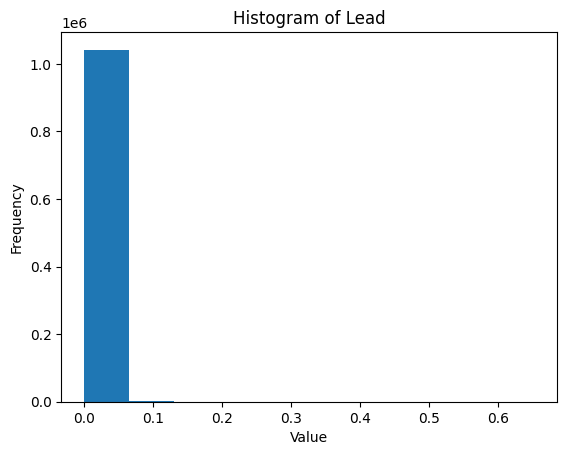

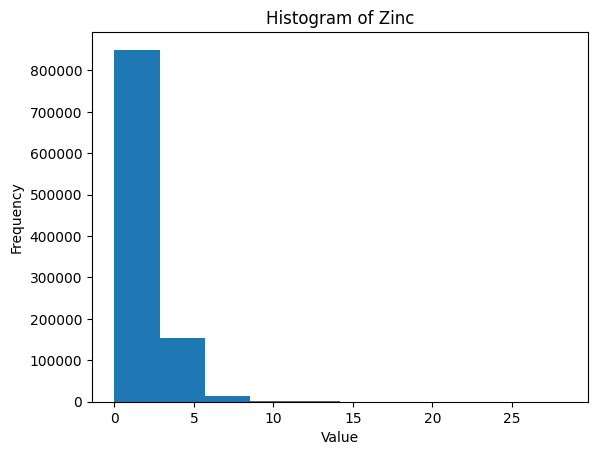

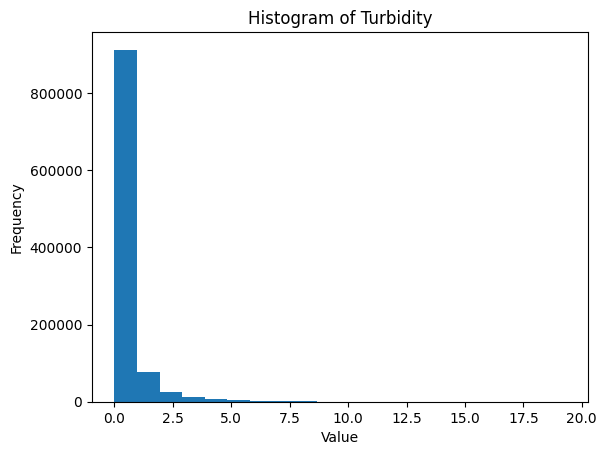

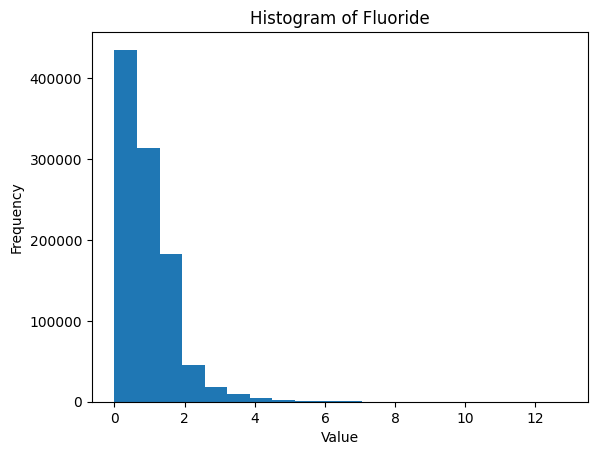

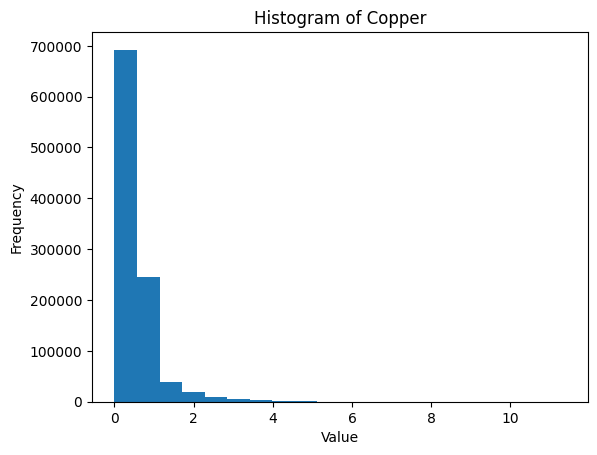

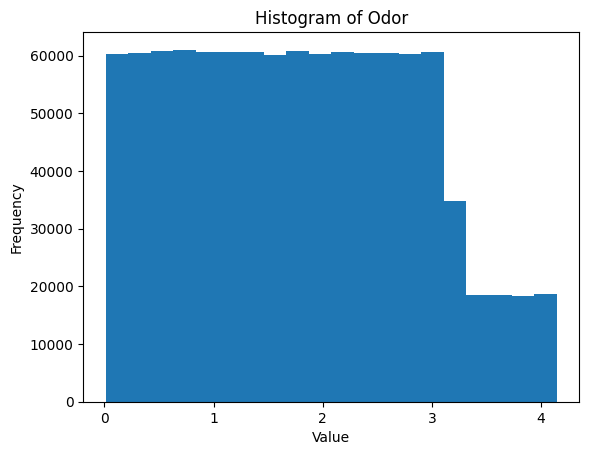

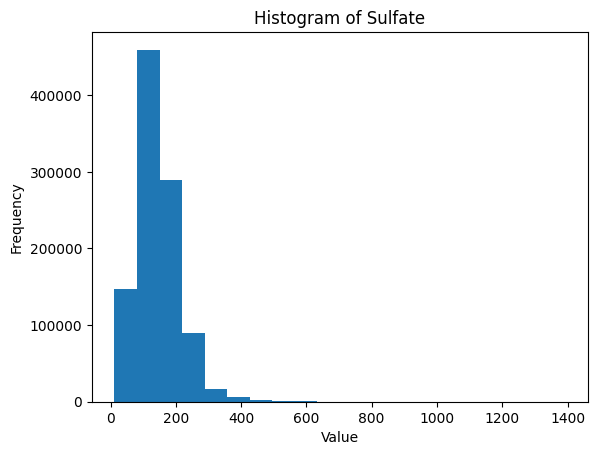

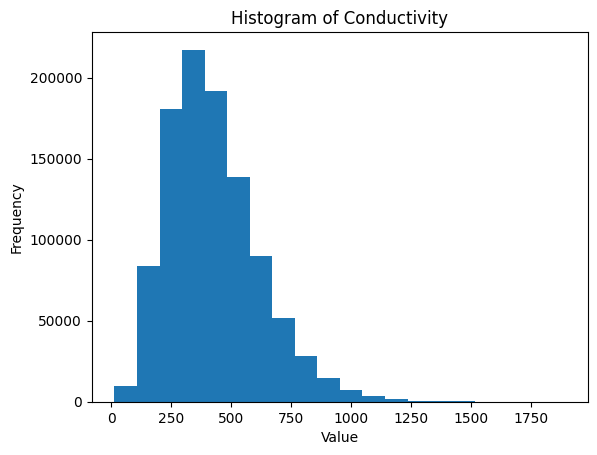

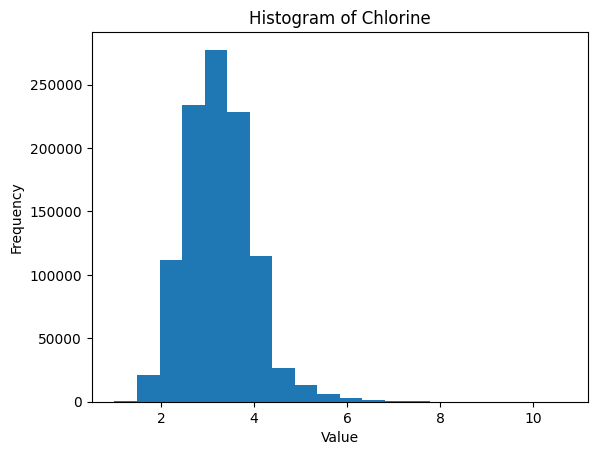

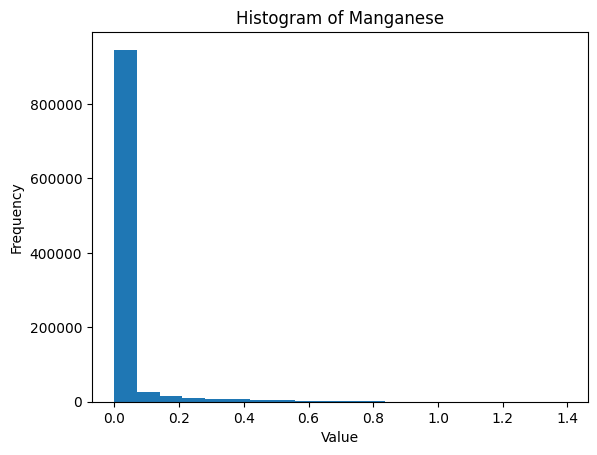

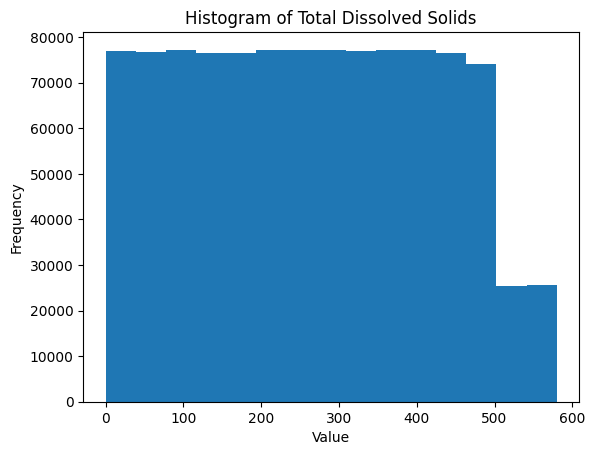

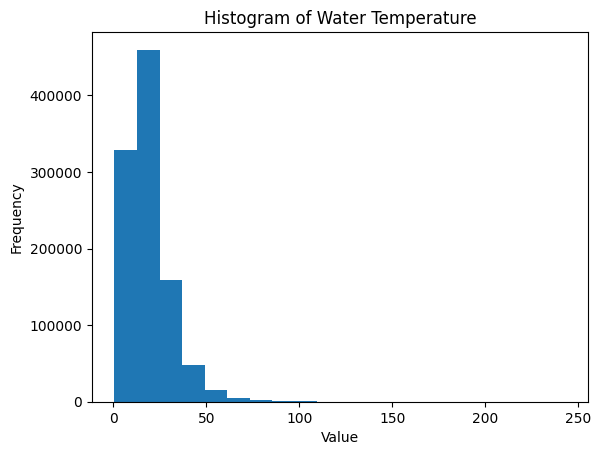

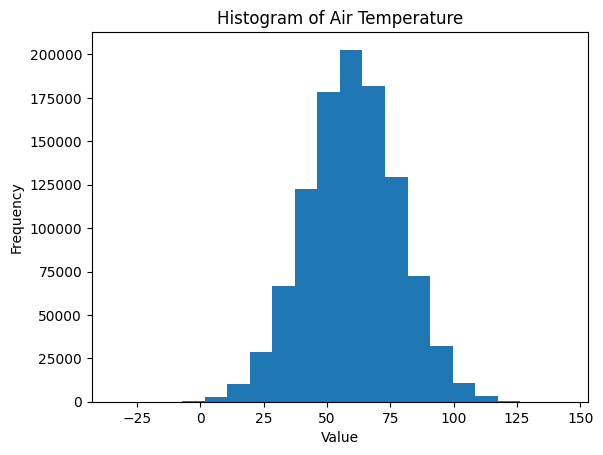

In [129]:
# Histograms
# disable SettingWithCopyWarning which flags every time we performed an operation on the dataframe's column
pd.options.mode.chained_assignment = None  

# Make a list for number of bins for each feature
count = 0
bin_list = [22,10,10,10,10,10,20,20,20,20,20,20,20,20,15,20,20,20]

# Create histograms for each continuous feature
for feature in continuous_features:
    if feature in df.columns:
        # Create a copy to avoid changing the original data
        data = df[feature].copy()

        # Apply log(10) function to severely skewed distributions, adding 1 to avoid log(0)
        if feature in ['Manganese', 'Iron', 'Lead']:
            data += 1
            data = np.log10(data)
        
        plt.hist(data, bins=bin_list[count])
        plt.title(f'Histogram of {feature}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        # Uncomment next 
        # plt.savefig(f'images/histograms/{feature}')
        plt.show()
        count += 1

### Visualizing Categorical Features

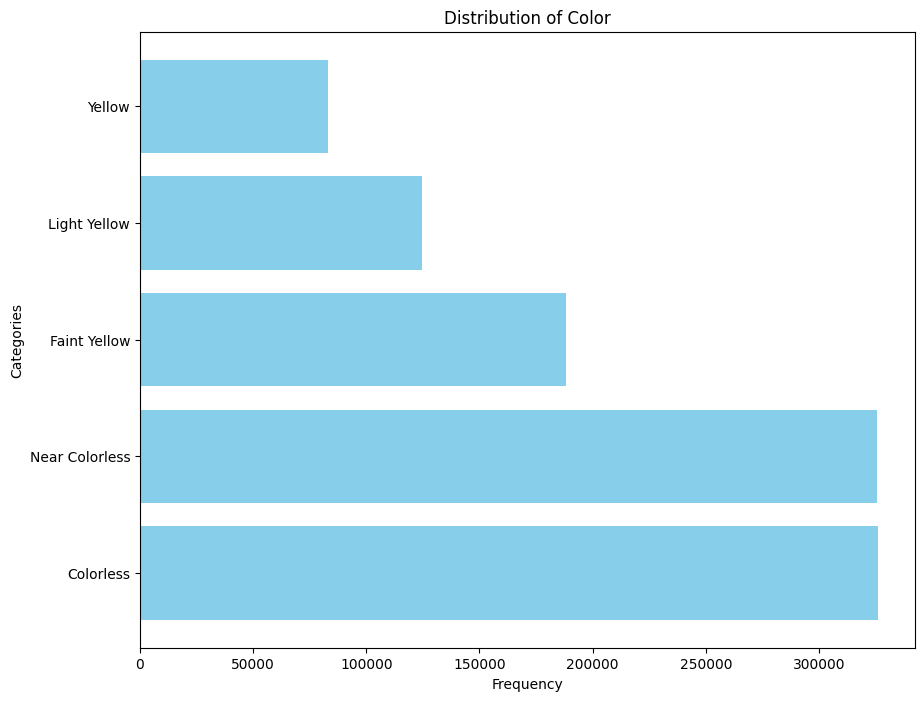

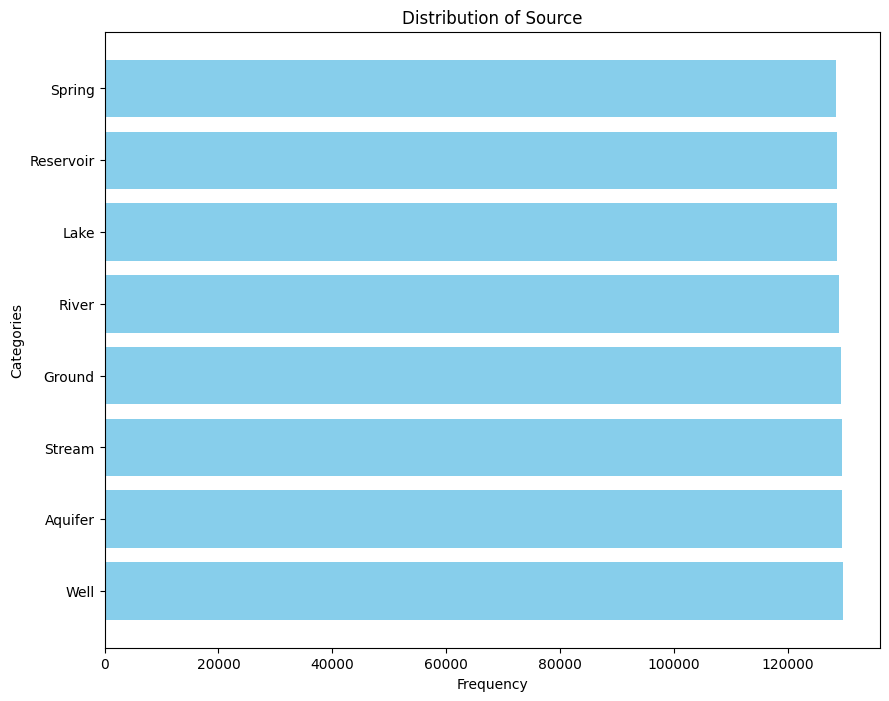

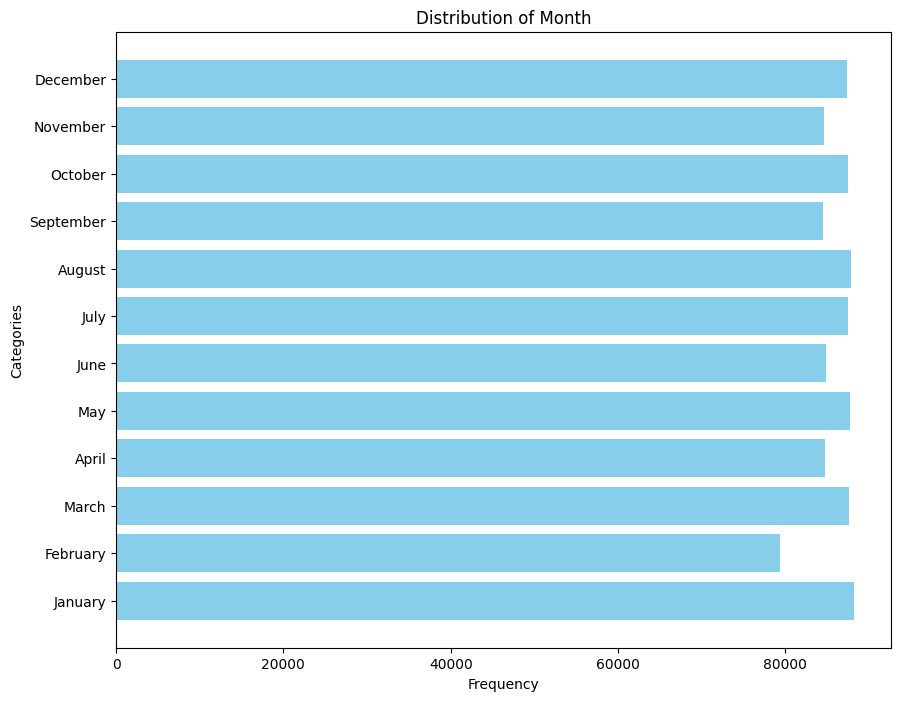

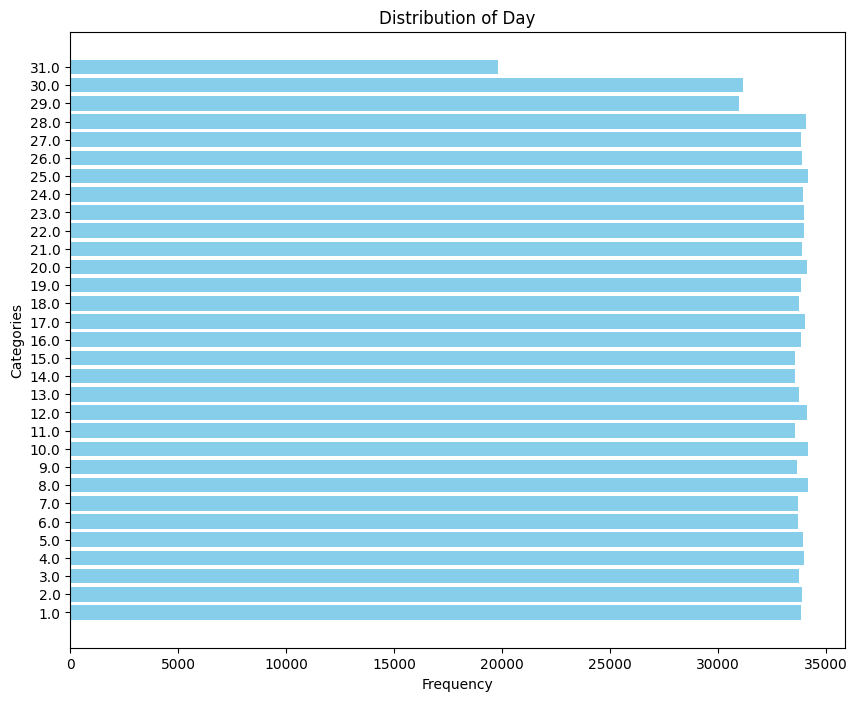

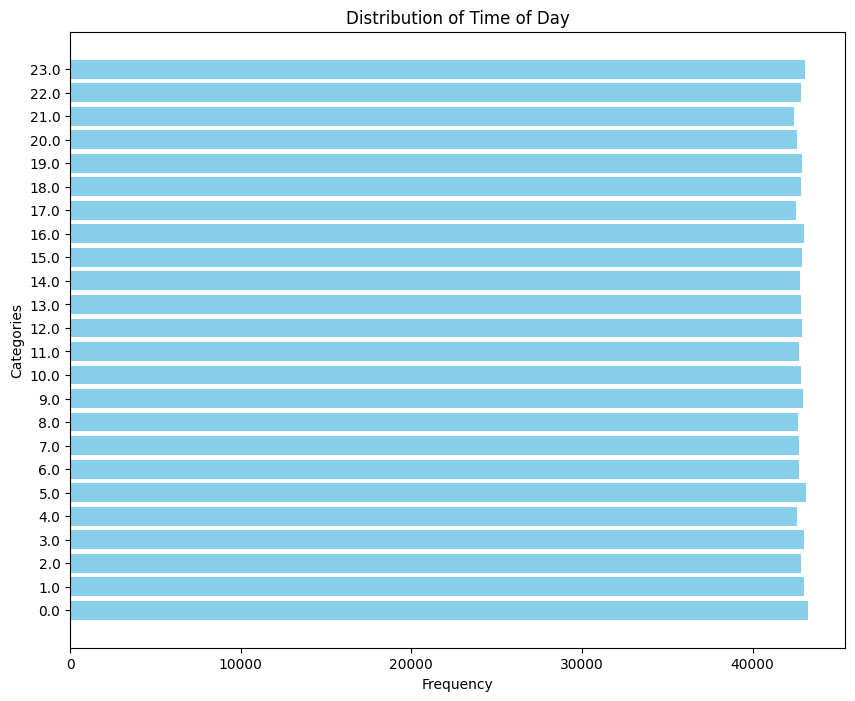

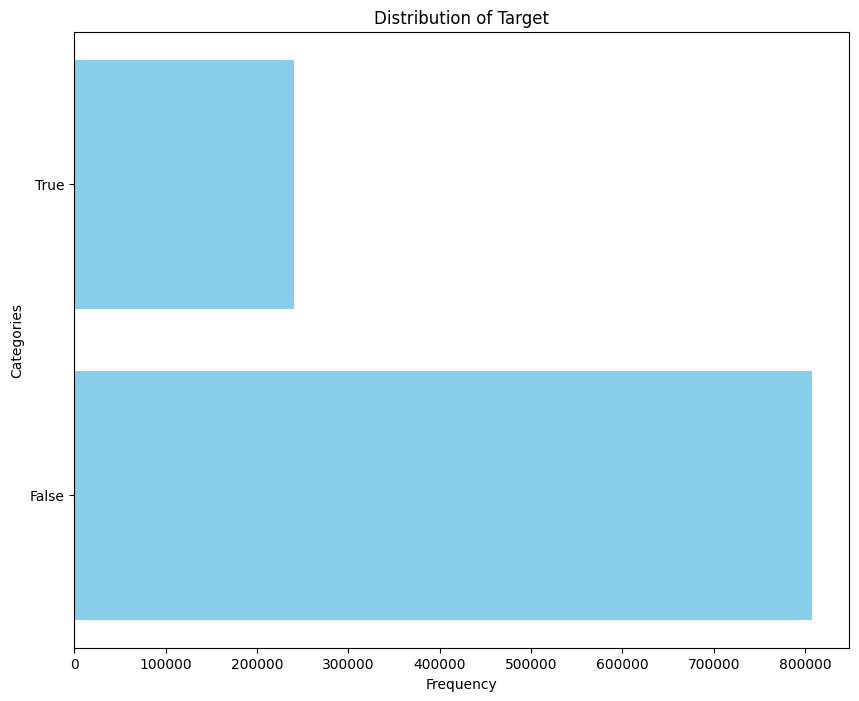

In [132]:
# Bar Plots
plot_copy = df.copy()

# Change target feature to True/False
plot_copy['Target'] = plot_copy['Target'].map({0: False, 1: True})


# Mapping for months to sort them chronologically
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Iterate through each categorical feature
for feature in categorical_features:
    if feature in plot_copy.columns:
        if feature == 'Month':
            # Sort 'Month' by chronological order
            category_counts = plot_copy[feature].map(month_order).value_counts().sort_index()
            # Map back to month names for plotting
            category_counts.index = category_counts.index.map({v: k for k, v in month_order.items()})
        elif feature in ['Day', 'Time of Day']:
            # Sort 'Day' and 'Time of Day' by their natural order
            category_counts = plot_copy[feature].value_counts().sort_index()
        else:
            # For other features, sort by frequency
            category_counts = plot_copy[feature].value_counts()

        # Create a horizontal bar plot
        plt.figure(figsize=(10, 8))
        plt.barh(category_counts.index.astype(str), category_counts.values, color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel('Frequency')
        plt.ylabel('Categories')
        plt.show()
# # Iterate through each categorical feature
# for feature in categorical_features:
#     if feature in plot_copy.columns:
#         # Calculate the frequency of each category
#         category_counts = plot_copy[feature].value_counts()
        
#         # Create a horizontal bar plot
#         plt.figure(figsize=(10, 8))
#         plt.barh(category_counts.index.astype(str), category_counts.values, color='skyblue')
#         plt.title(f'Distribution of {feature}')
#         plt.xlabel('Frequency')
#         plt.ylabel('Categories')
#         # Uncomment the next line to save the plot as an image
#         # plt.savefig(f'images/bar_plots/{feature}')
#         plt.show()

# Outliers


### IQR Outliers

In [108]:
outlier_copy = df.copy()

def calculate_iqr_bounds_and_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = round(Q1 - 1.5 * IQR, 4)
    upper_bound = round(Q3 + 1.5 * IQR, 4)
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return (lower_bound, upper_bound), outliers.shape[0]

outliers_df = pd.DataFrame(columns=['Feature', 'IQR Bounds', 'Number of Outliers'])

# Loop through each feature to detect outliers and store the results in the DataFrame
for feature in continuous_features:
    bounds, num_outliers = calculate_iqr_bounds_and_outliers(outlier_copy, feature)
    new_row = pd.DataFrame({'Feature': [feature], 'IQR Bounds': [bounds], 'Number of Outliers': [num_outliers]})
    outliers_df = pd.concat([outliers_df, new_row], ignore_index=True)

# Display the resulting DataFrame
print(outliers_df)

                   Feature             IQR Bounds Number of Outliers
0                       pH       (5.2849, 9.6313)              26481
1                     Iron      (-0.0746, 0.1244)             166613
2                  Nitrate     (-1.4954, 13.0331)              30623
3                 Chloride    (20.1198, 332.9594)              29921
4                     Lead            (-0.0, 0.0)            1017816
5                     Zinc      (-2.2893, 4.9162)              29016
6                Turbidity       (-0.797, 1.4268)              72733
7                 Fluoride      (-1.0509, 2.7398)              31948
8                   Copper      (-0.7031, 1.5082)              49249
9                     Odor      (-1.7246, 5.2137)                  0
10                 Sulfate   (-26.8653, 304.6727)              23092
11            Conductivity   (-84.1925, 903.8568)              19371
12                Chlorine        (1.316, 5.1067)              16268
13               Manganese      (-

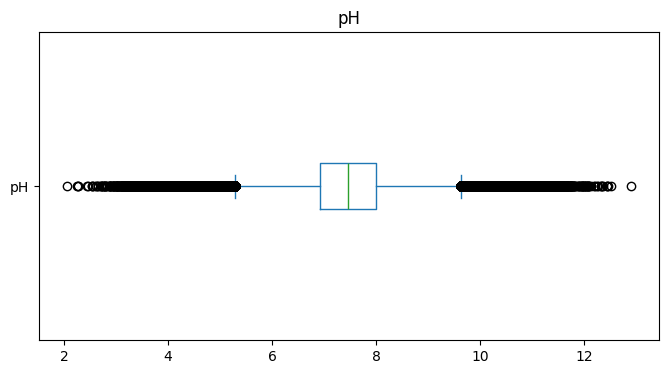

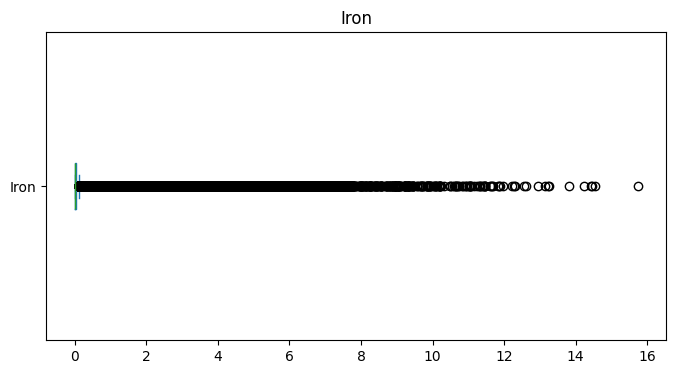

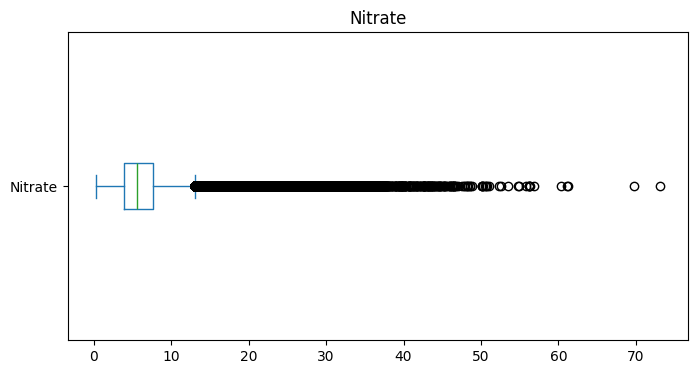

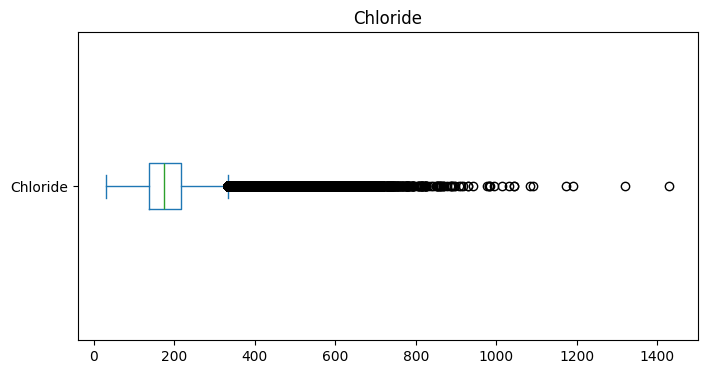

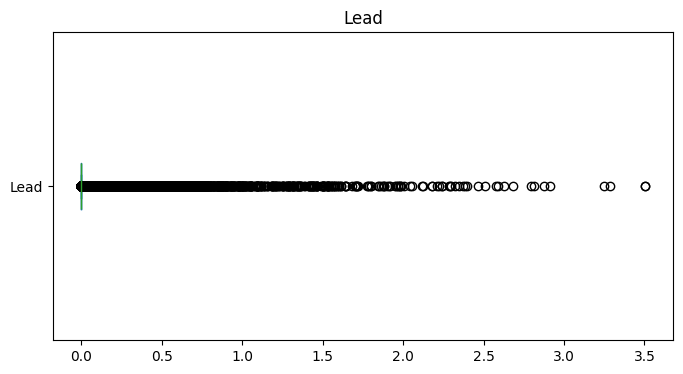

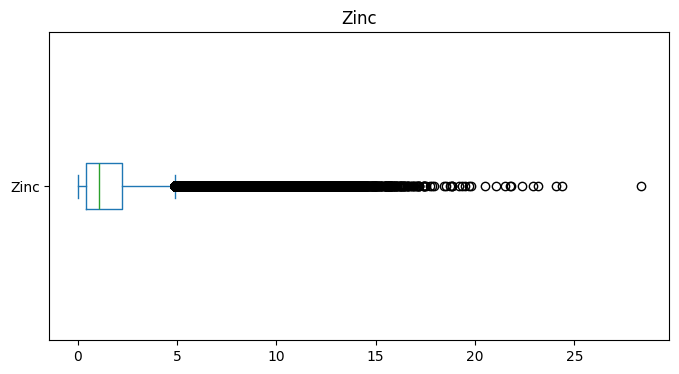

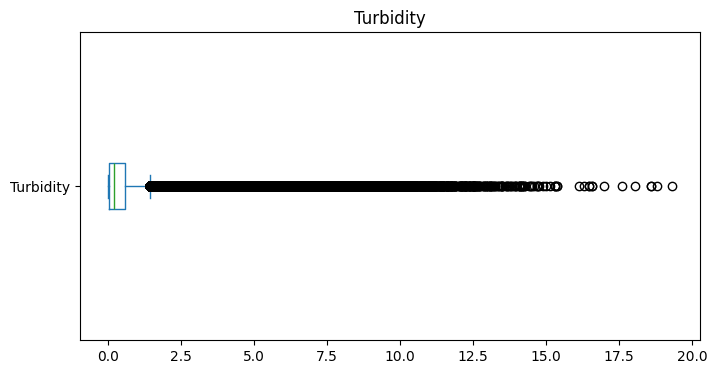

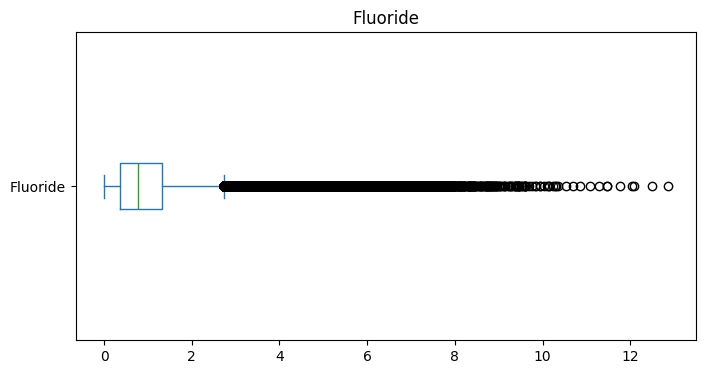

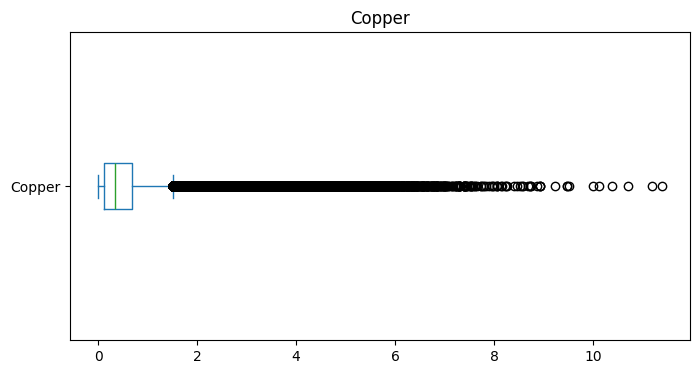

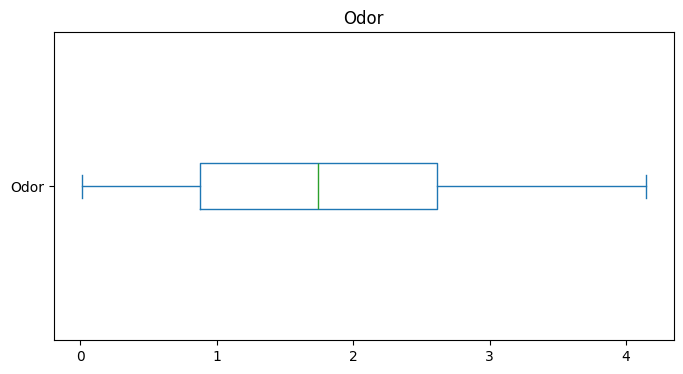

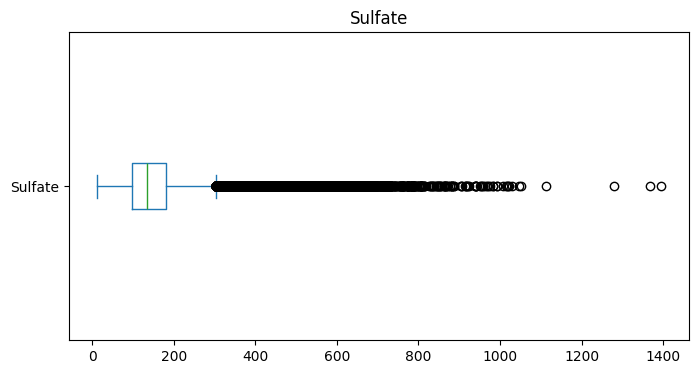

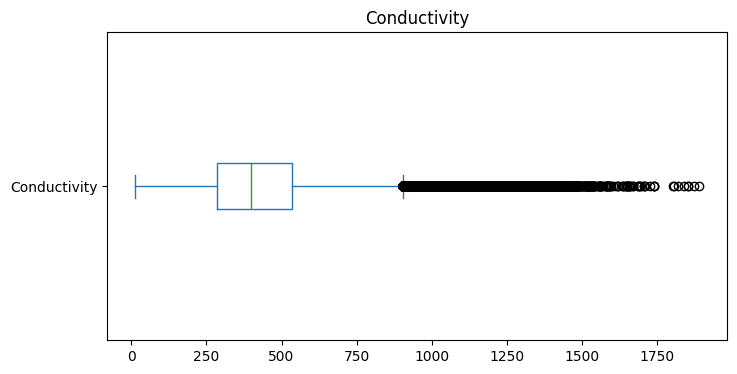

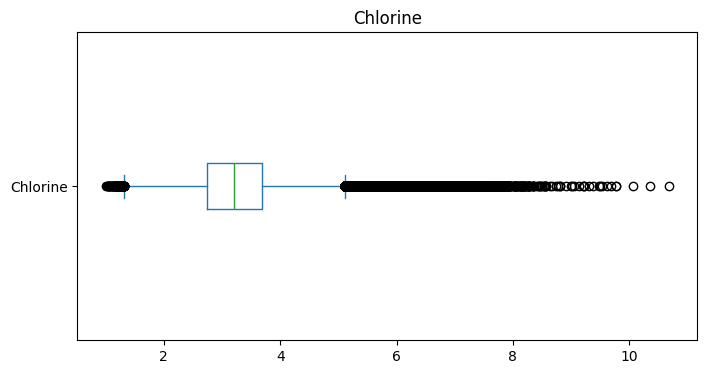

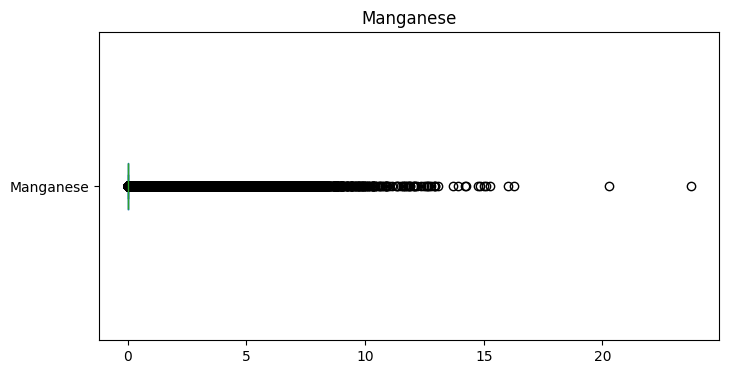

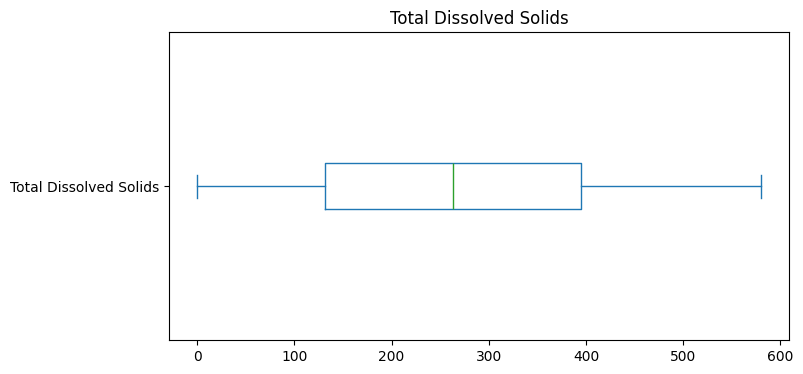

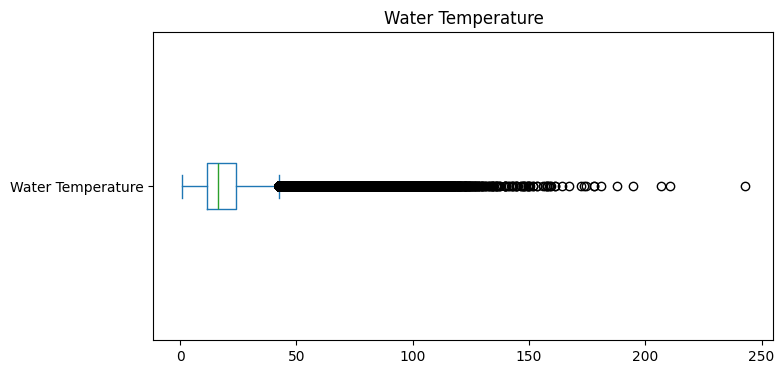

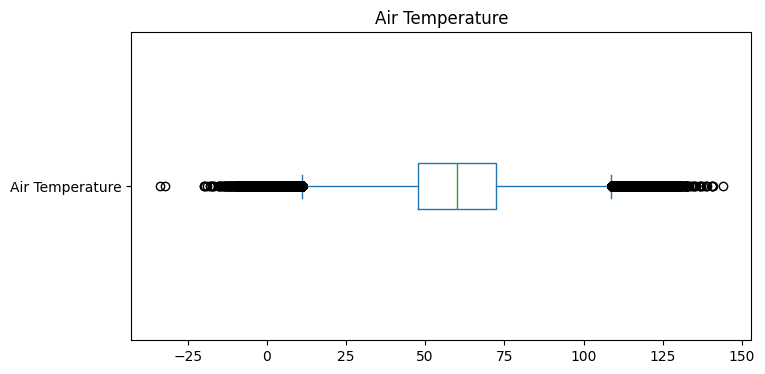

In [109]:
# Showing boxplots
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    outlier_copy[feature].plot(kind='box', vert=False)
    plt.title(feature)
    plt.show()

### Z-Score Outliers

In [110]:
from scipy import stats

outliers_count_zscore = pd.DataFrame(columns=['Feature', 'Number of Outliers'])
for feature in continuous_features:
    outlier_copy[feature + '_zscore'] = stats.zscore(outlier_copy[feature], nan_policy='omit')
    num_outliers = outlier_copy[(outlier_copy[feature + '_zscore'] > 3) | (outlier_copy[feature + '_zscore'] < -3)].shape[0]
    new_row = pd.DataFrame({'Feature': [feature], 'Number of Outliers': [num_outliers]})
    outliers_count_zscore = pd.concat([outliers_count_zscore, new_row], ignore_index=True)

print(outliers_count_zscore)


                   Feature Number of Outliers
0                       pH              12762
1                     Iron              18974
2                  Nitrate              16547
3                 Chloride              15856
4                     Lead               2965
5                     Zinc              13895
6                Turbidity              23865
7                 Fluoride              18017
8                   Copper              21917
9                     Odor                  0
10                 Sulfate              13829
11            Conductivity               9357
12                Chlorine              10174
13               Manganese              18525
14  Total Dissolved Solids                  0
15       Water Temperature              16715
16         Air Temperature               2818


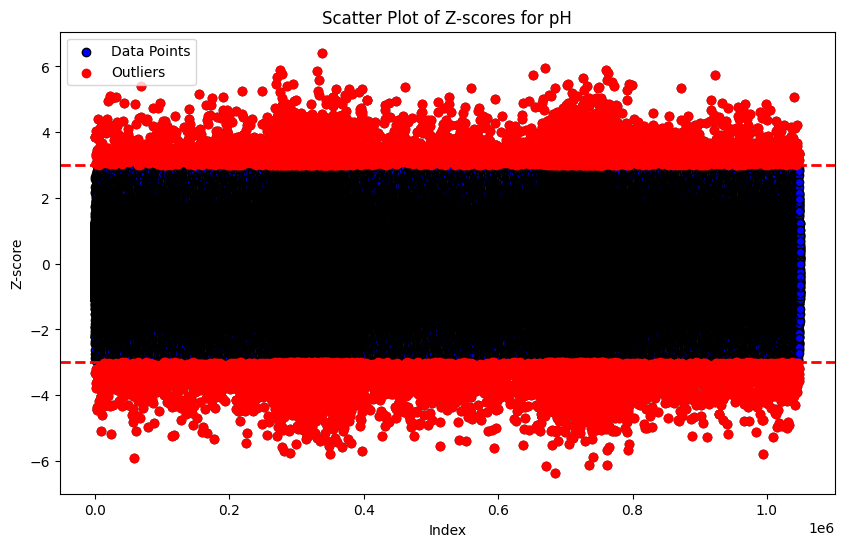

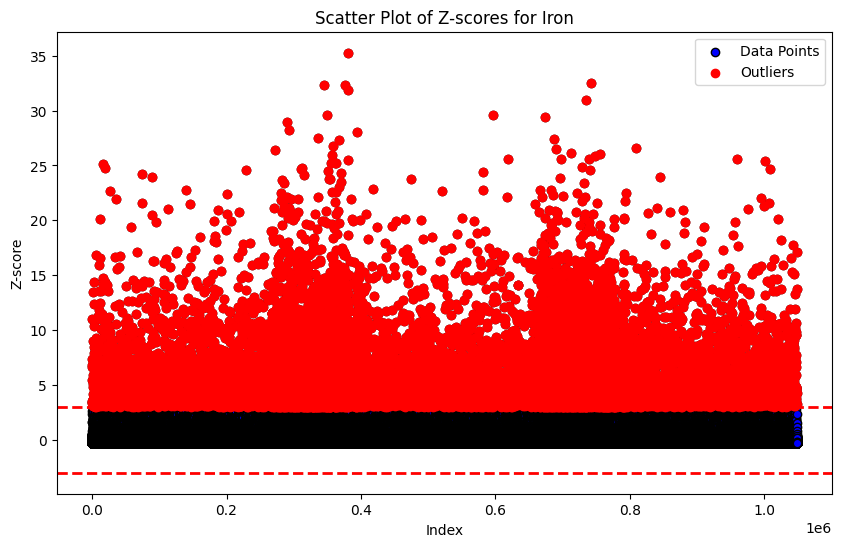

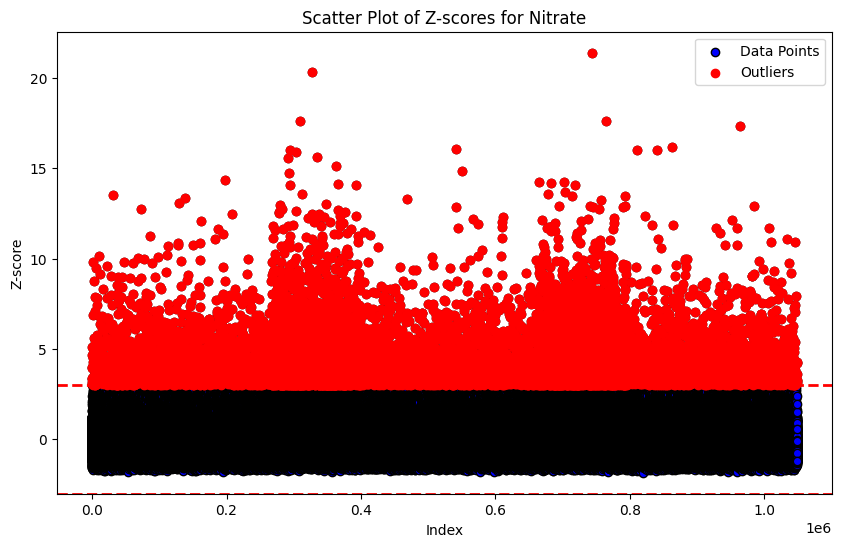

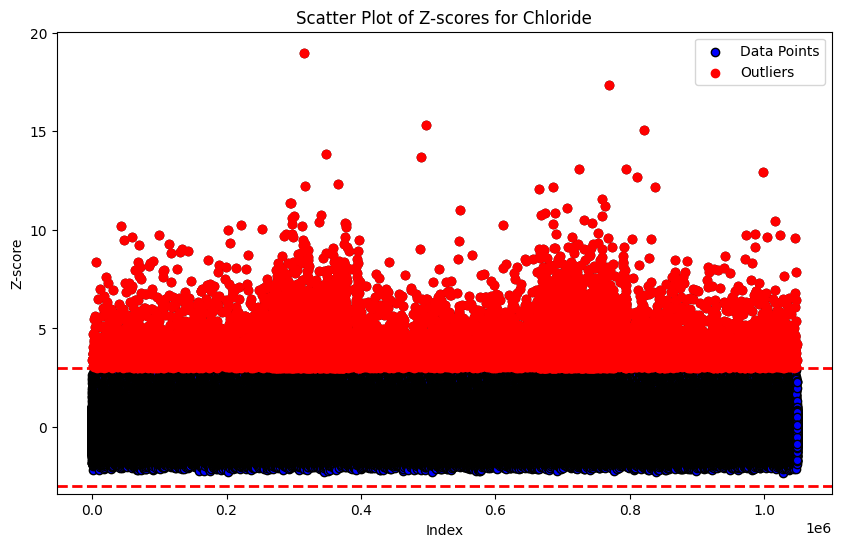

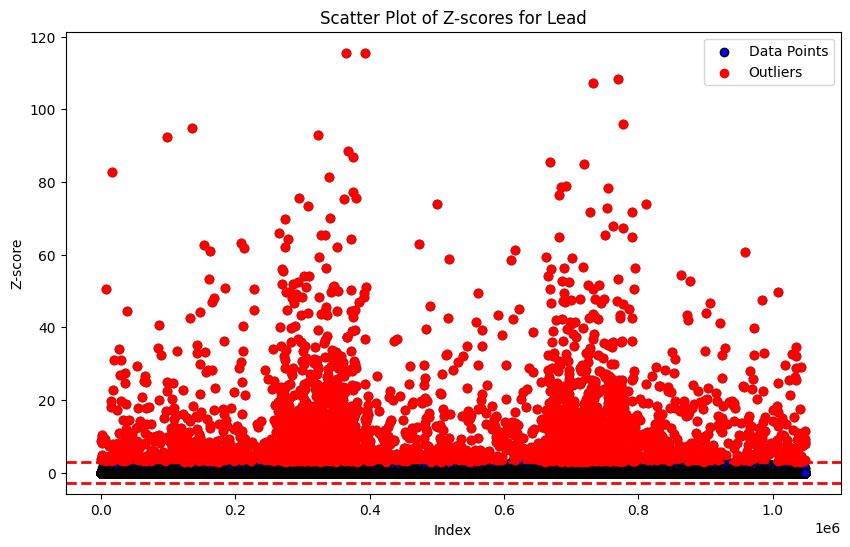

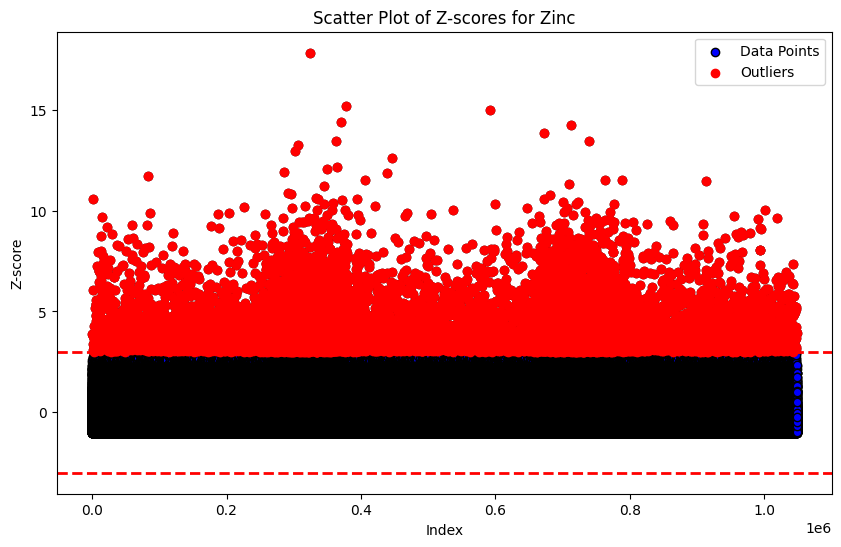

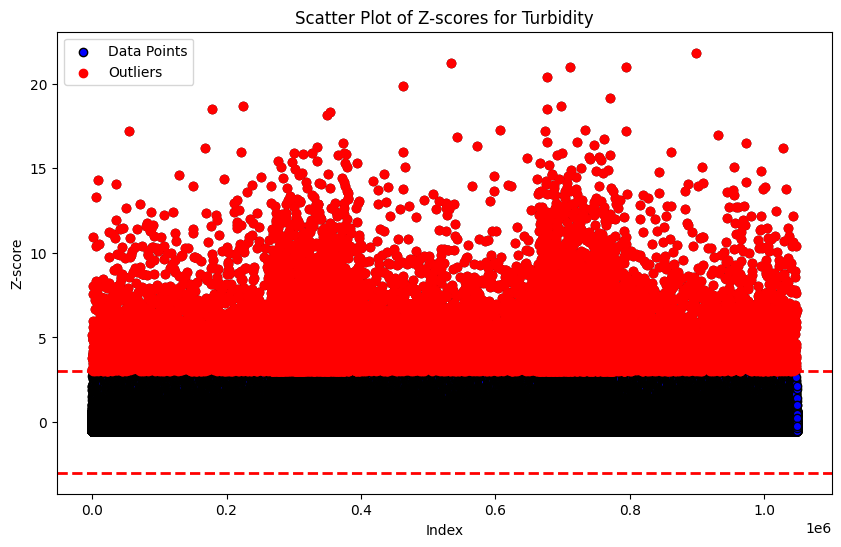

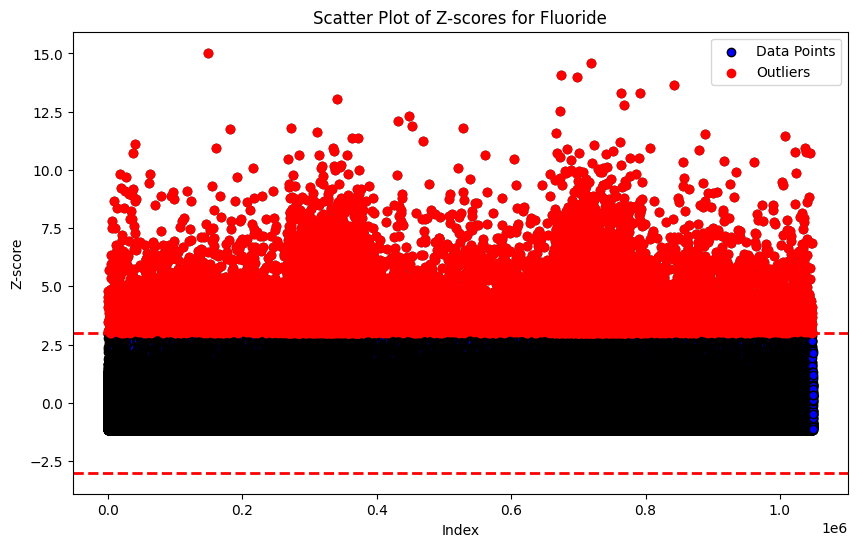

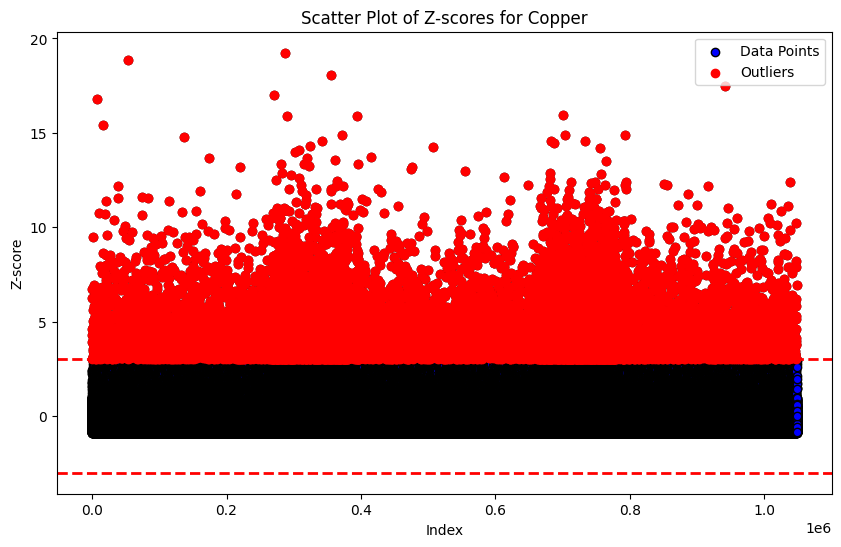

/Users/sebastienlee/Documents/school/2024/spring_2024/fundamentals_data_science/project-env/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


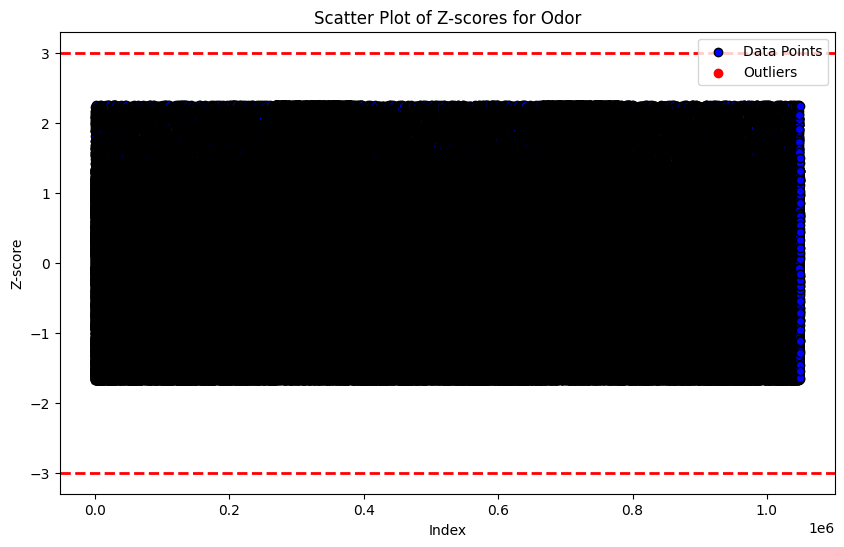

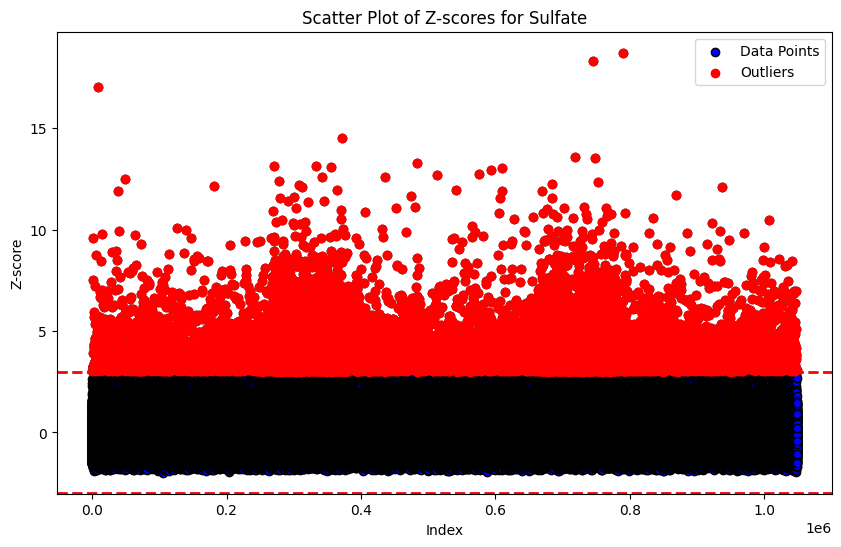

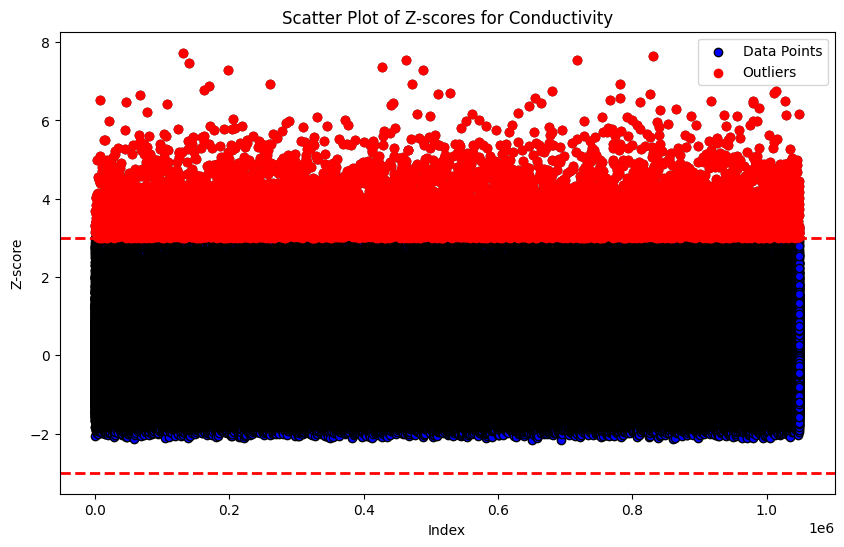

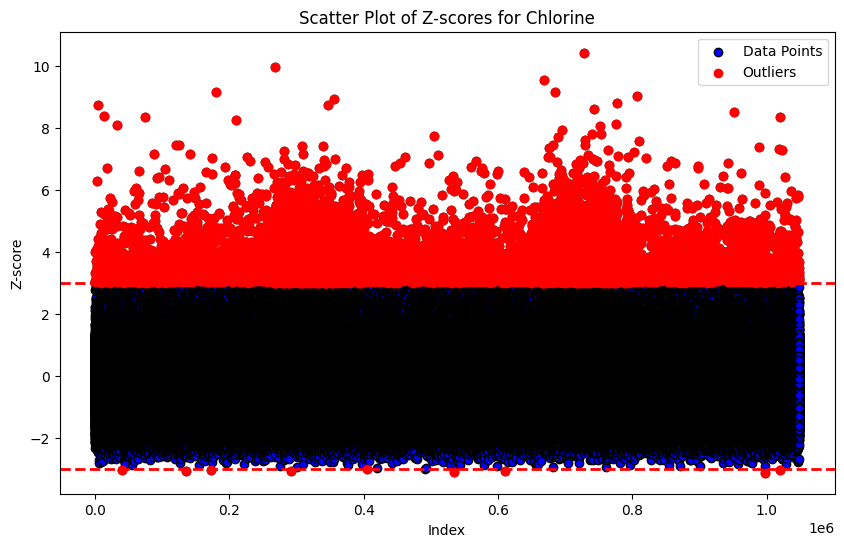

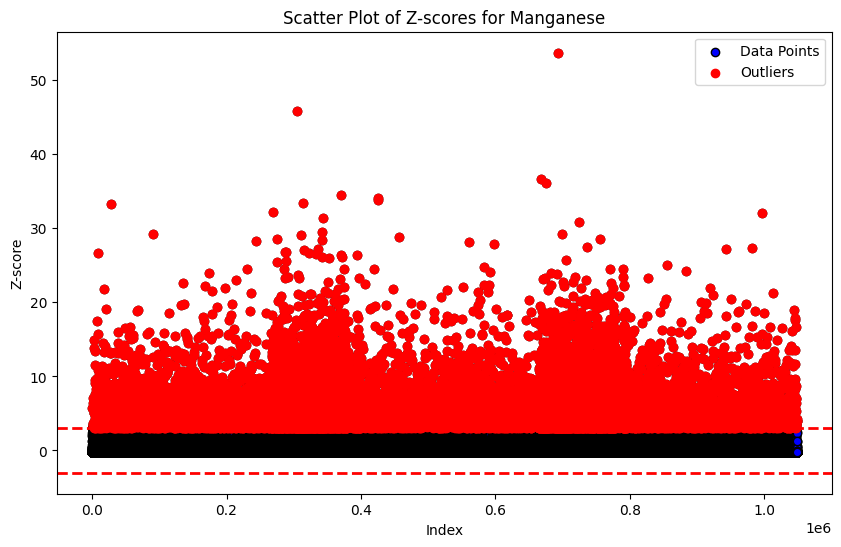

/Users/sebastienlee/Documents/school/2024/spring_2024/fundamentals_data_science/project-env/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


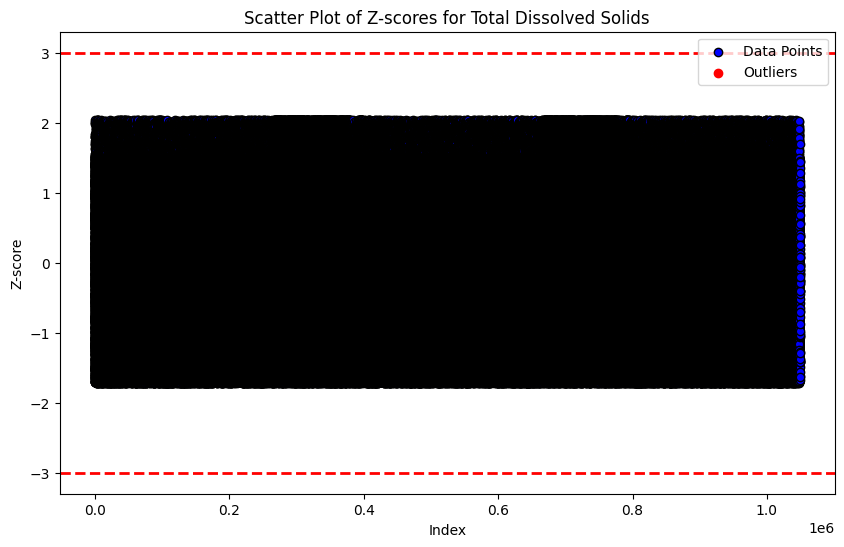

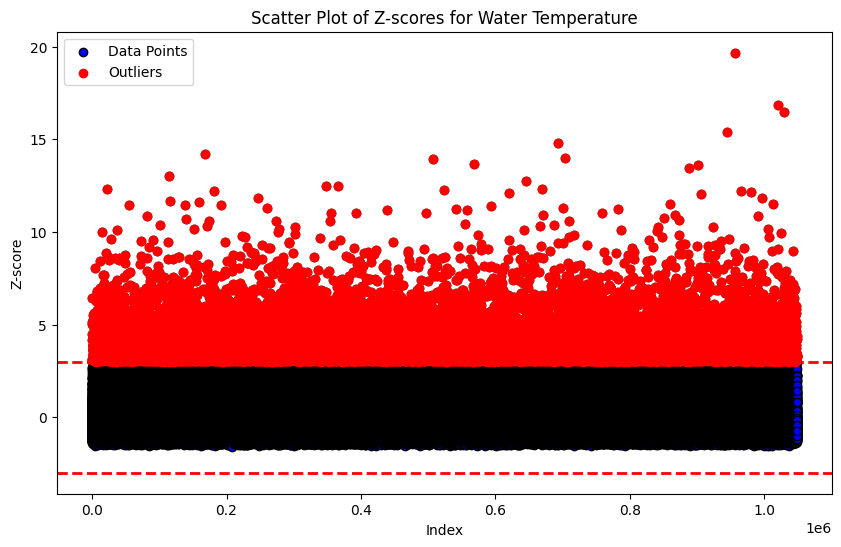

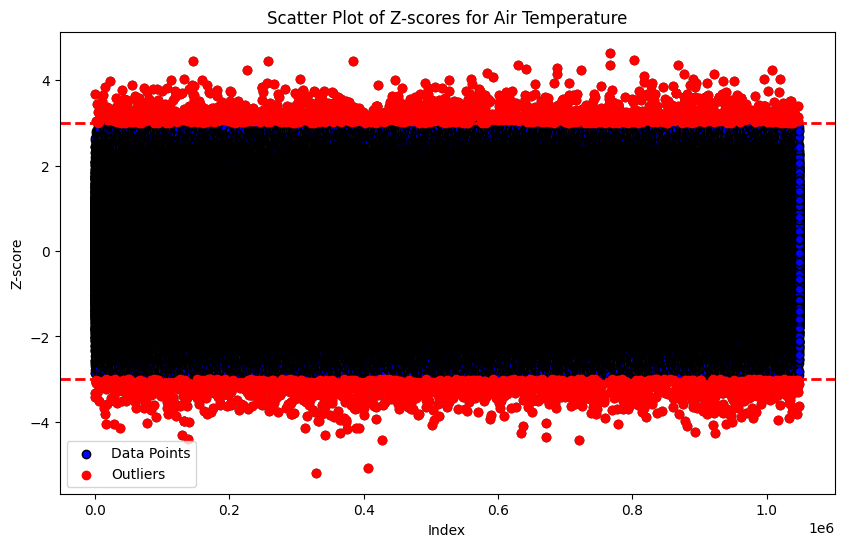

In [111]:
for feature in continuous_features:
    outlier_copy[feature + '_zscore'] = stats.zscore(outlier_copy[feature], nan_policy='omit')

    plt.figure(figsize=(10, 6))

    plt.scatter(range(len(outlier_copy)), outlier_copy[feature + '_zscore'], color='blue', edgecolor='k', label='Data Points')

    outliers = outlier_copy[(outlier_copy[feature + '_zscore'] > 3) | (outlier_copy[feature + '_zscore'] < -3)]
    plt.scatter(outliers.index, outliers[feature + '_zscore'], color='red', label='Outliers')

    plt.axhline(3, color='red', linestyle='dashed', linewidth=2)
    plt.axhline(-3, color='red', linestyle='dashed', linewidth=2)

    plt.title(f'Scatter Plot of Z-scores for {feature}')
    plt.xlabel('Index')
    plt.ylabel('Z-score')
    plt.legend()

    plt.show()

### Log Outliers

In [112]:
log_outliers_df = pd.DataFrame(columns=['Feature', 'Number of Outliers'])

def detect_outliers_log(df, feature):
    transformed = np.log1p(df[feature])

    z_scores = np.abs(stats.zscore(transformed, nan_policy='omit'))

    num_outliers = np.sum(z_scores > 3)
    return num_outliers

for feature in continuous_features:
    num_outliers = detect_outliers_log(outlier_copy, feature)
    new_row = pd.DataFrame({'Feature': [feature], 'Number of Outliers': [num_outliers]})
    log_outliers_df = pd.concat([log_outliers_df, new_row], ignore_index=True)

print(log_outliers_df)

                   Feature Number of Outliers
0                       pH              13852
1                     Iron              28350
2                  Nitrate               5223
3                 Chloride               6314
4                     Lead               3579
5                     Zinc               2474
6                Turbidity              24039
7                 Fluoride               7098
8                   Copper              16526
9                     Odor                  0
10                 Sulfate               4385
11            Conductivity               5507
12                Chlorine               5371
13               Manganese              28723
14  Total Dissolved Solids              19656
15       Water Temperature               2474
16         Air Temperature              12578


/Users/sebastienlee/Documents/school/2024/spring_2024/fundamentals_data_science/project-env/env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


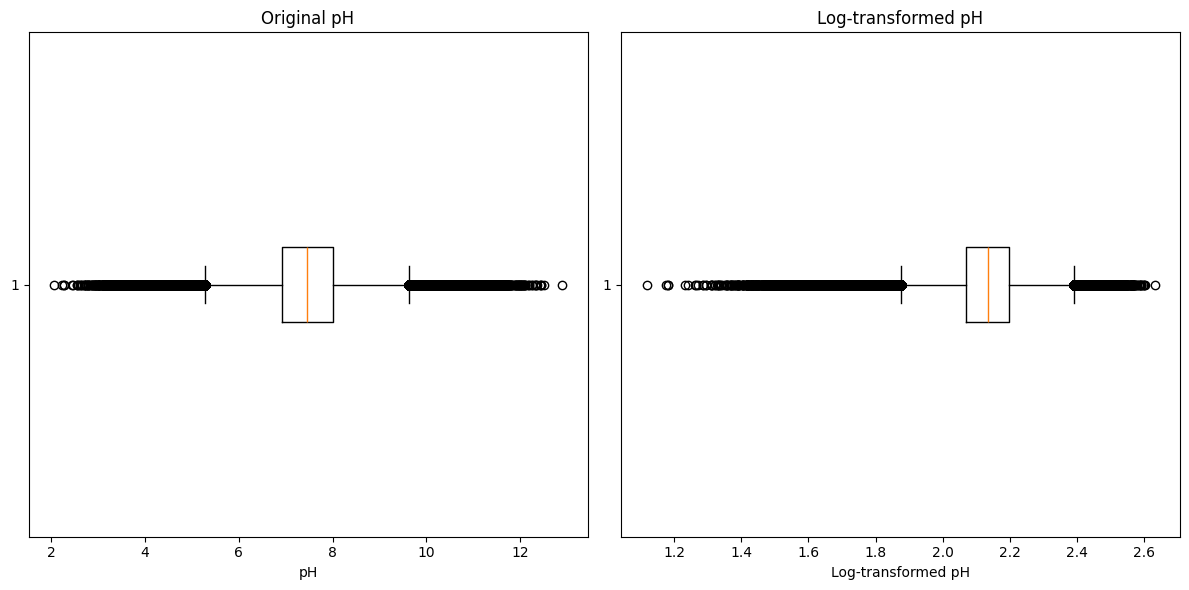

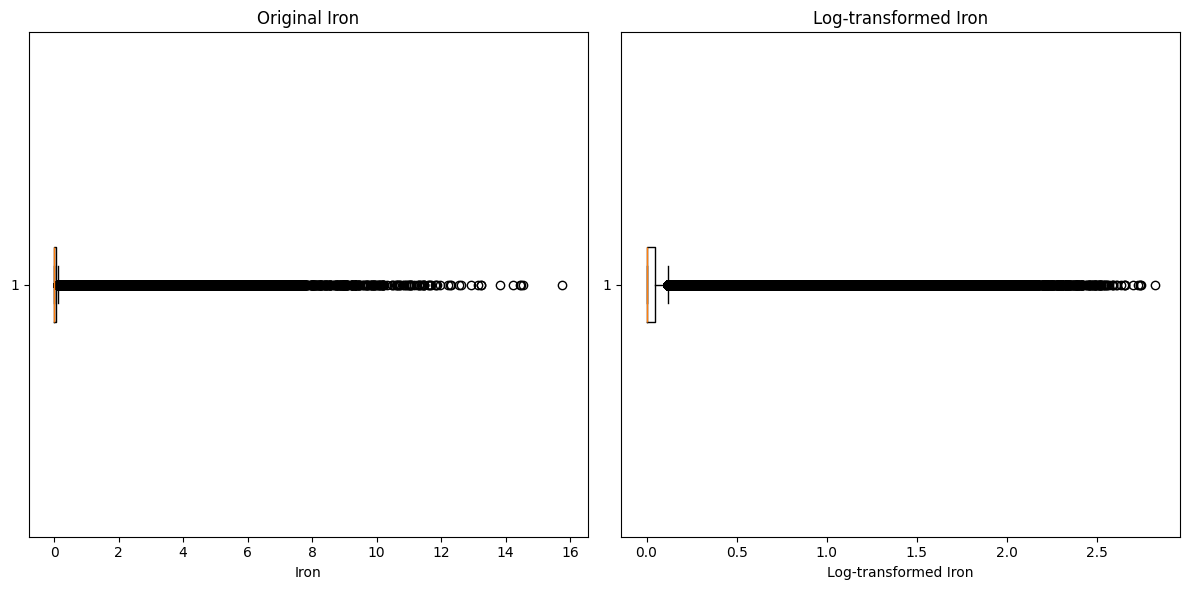

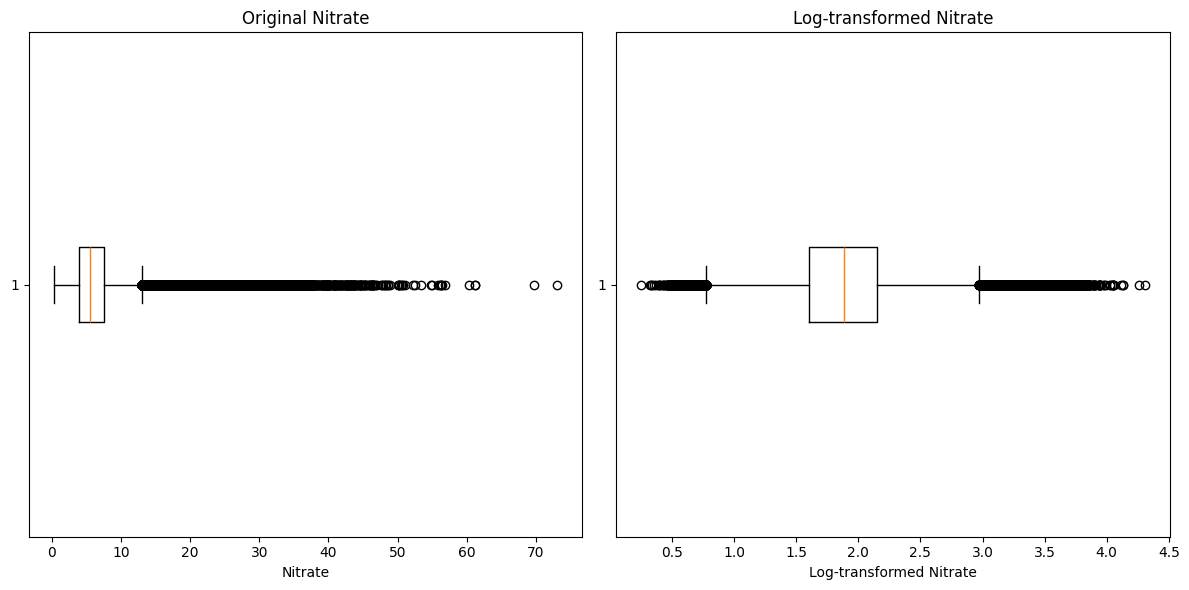

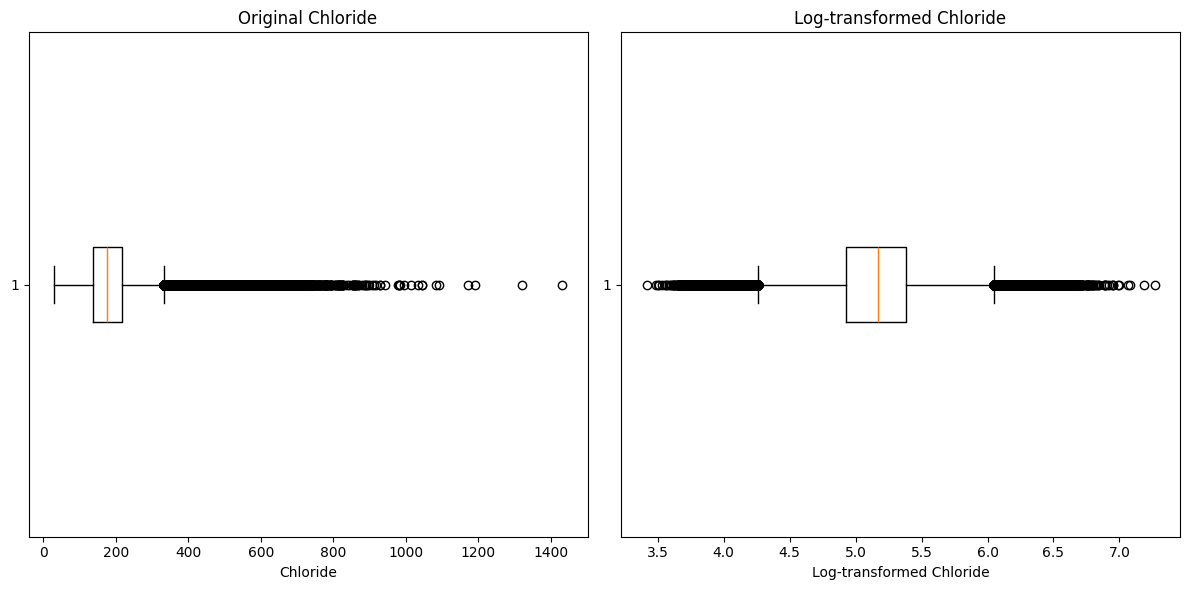

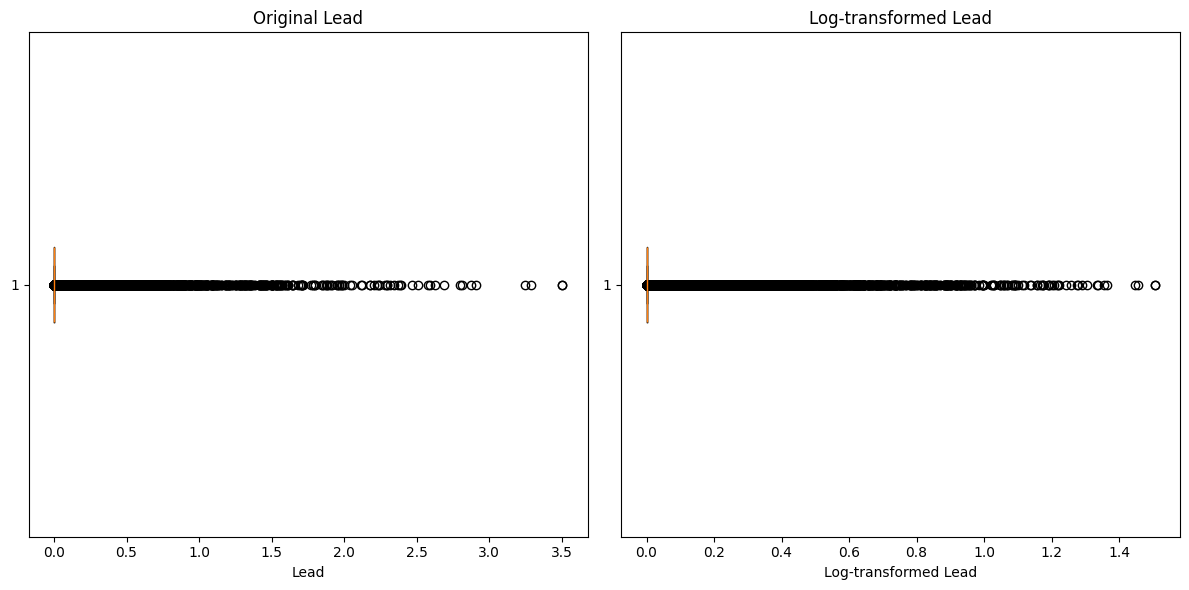

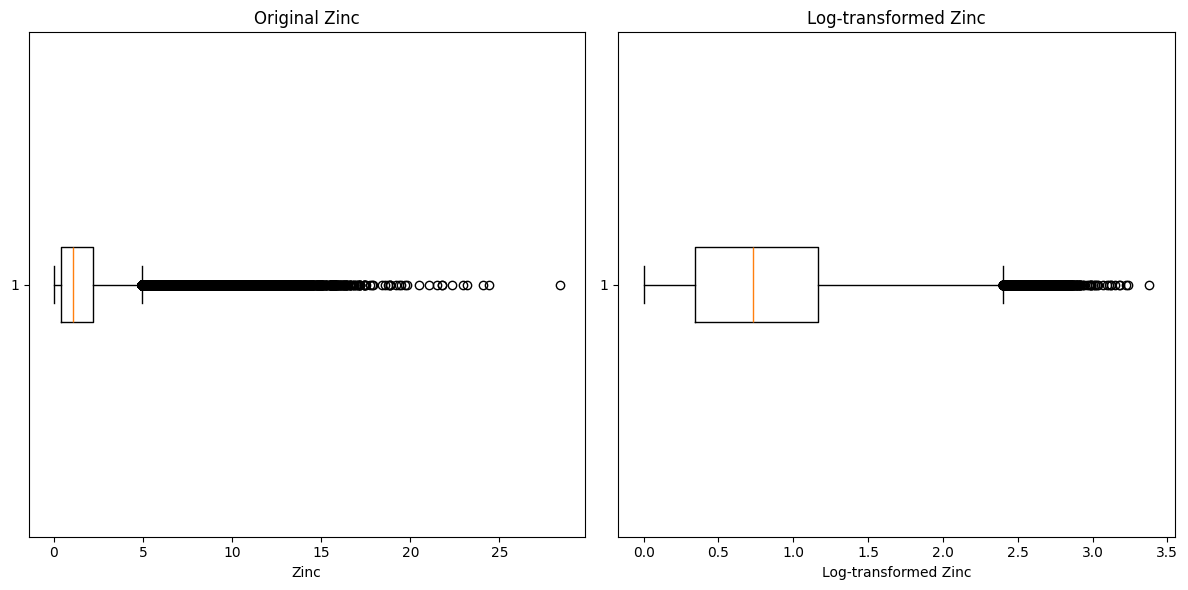

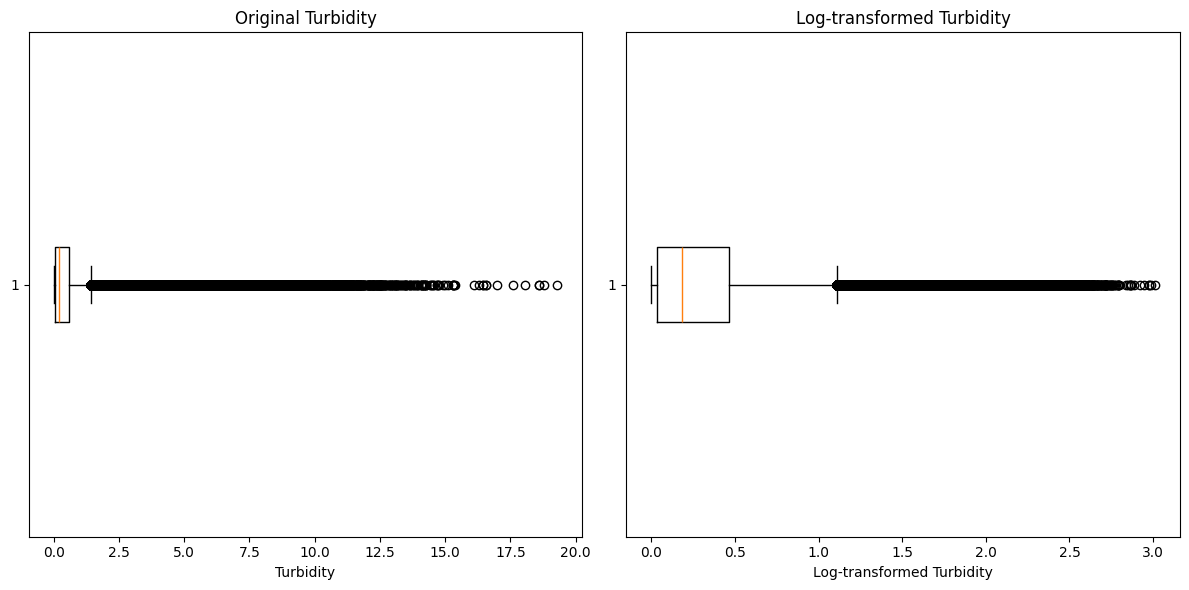

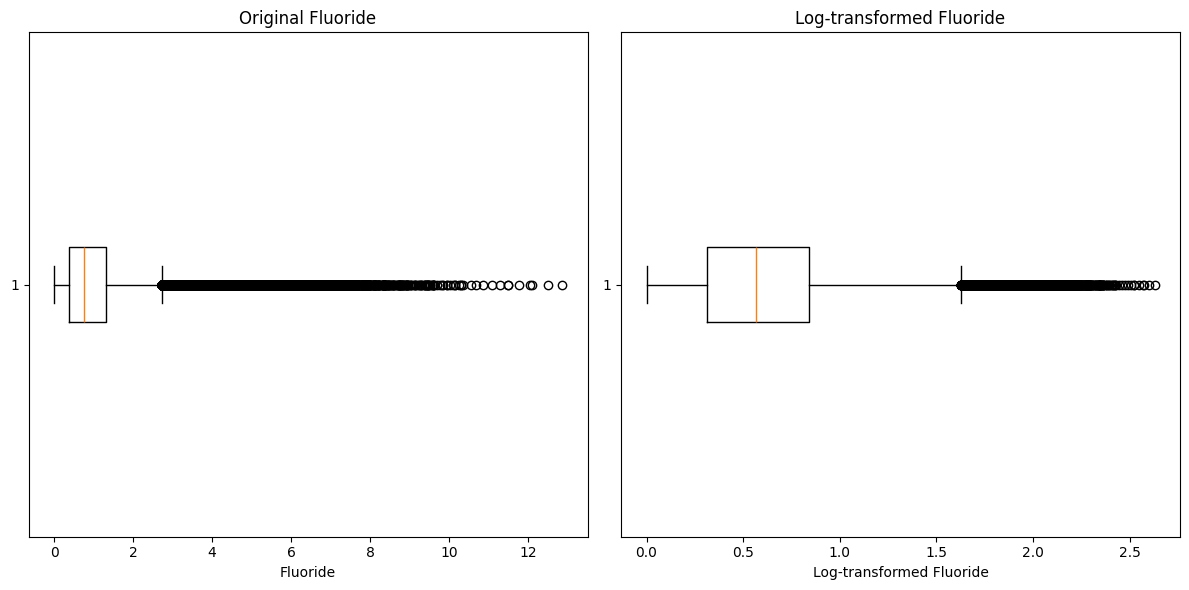

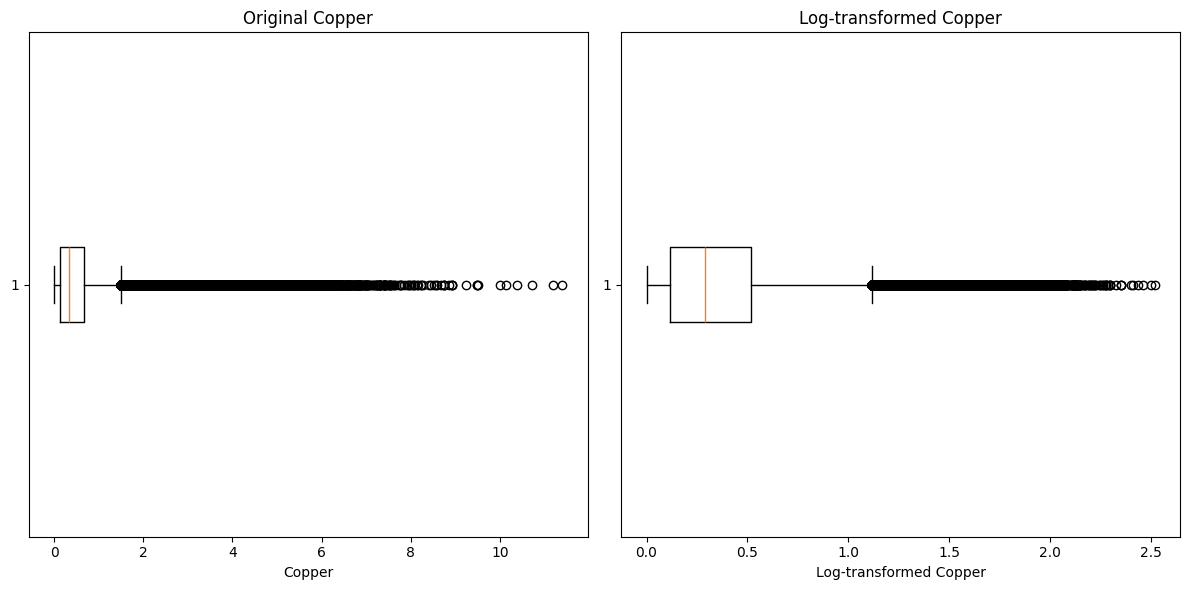

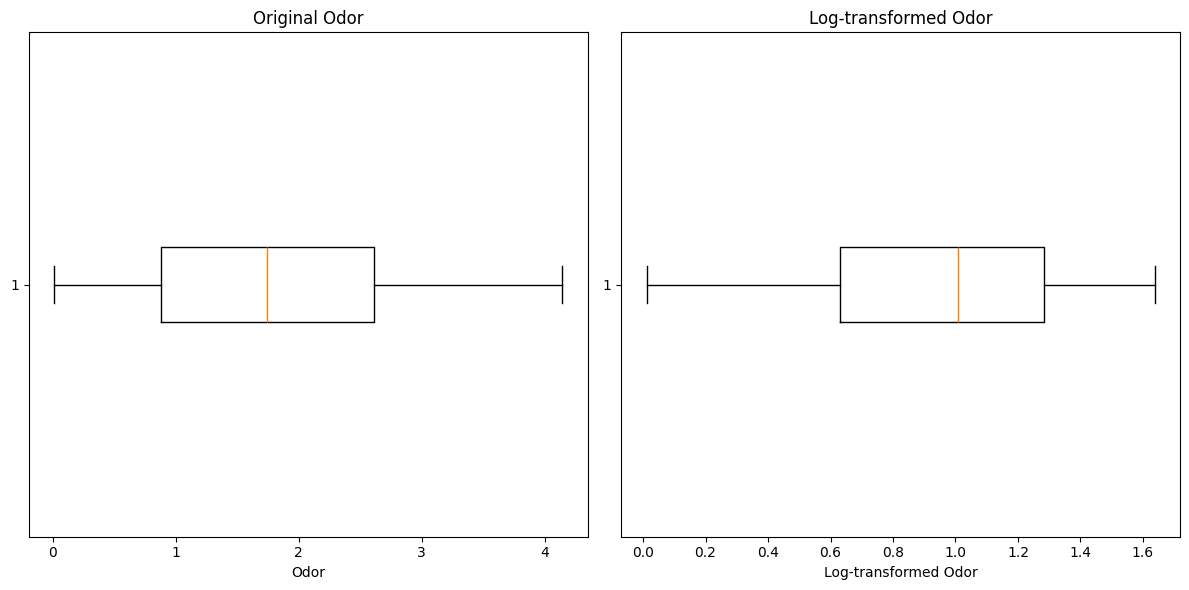

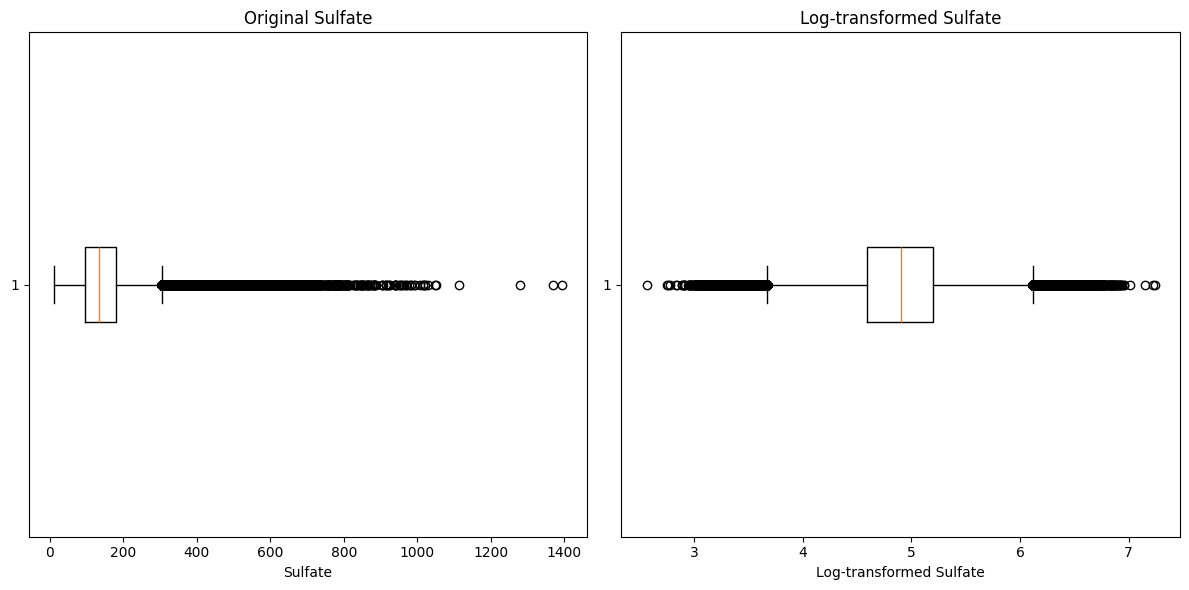

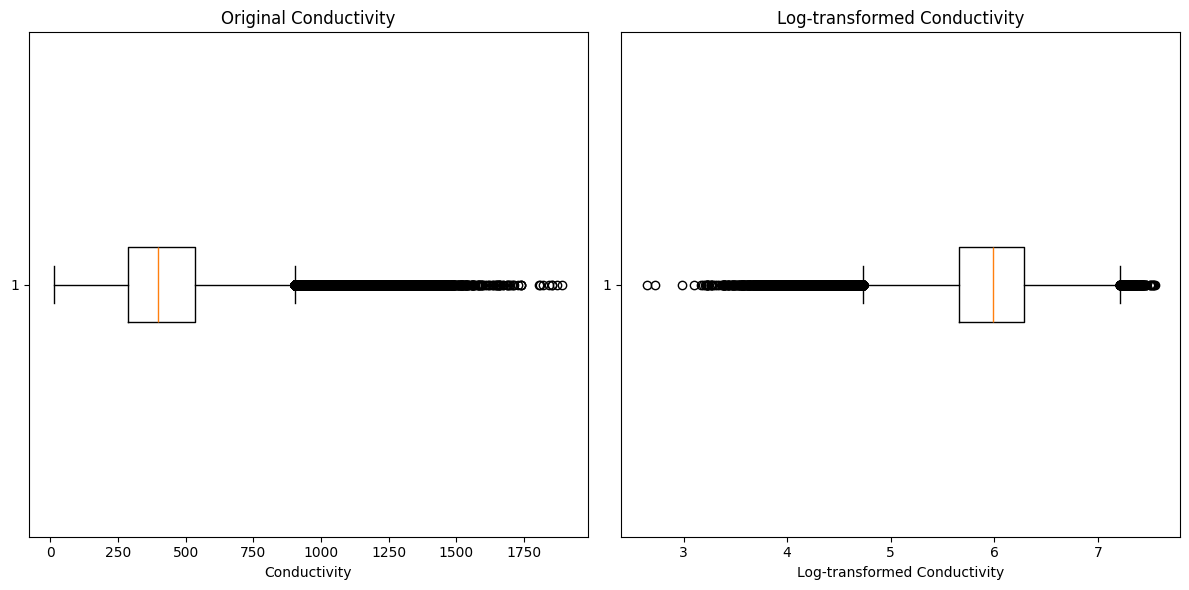

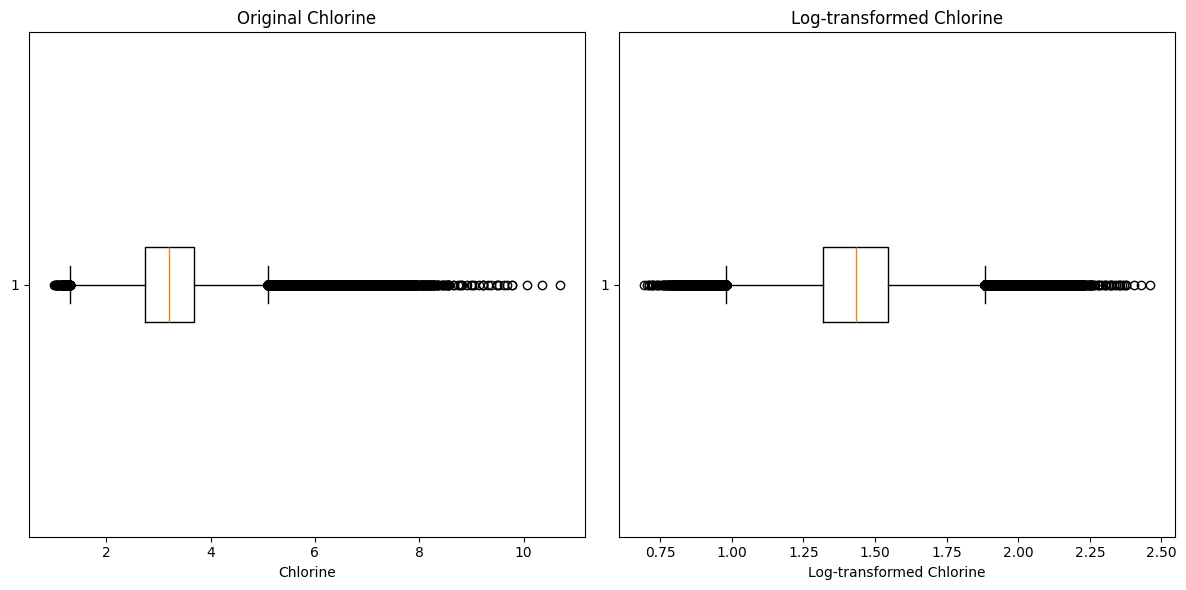

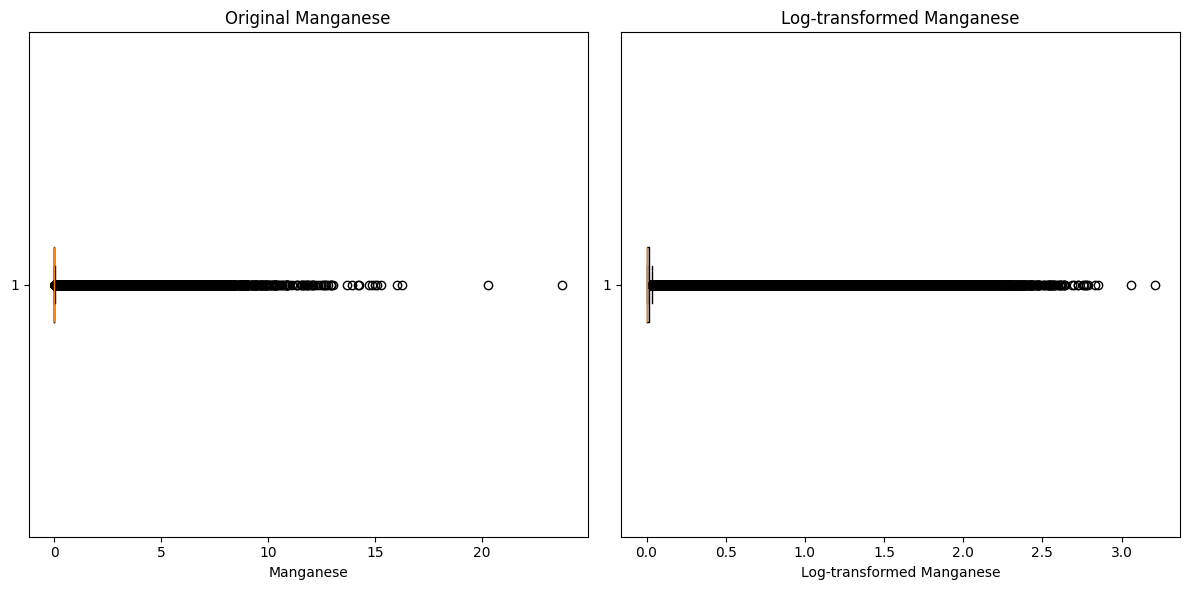

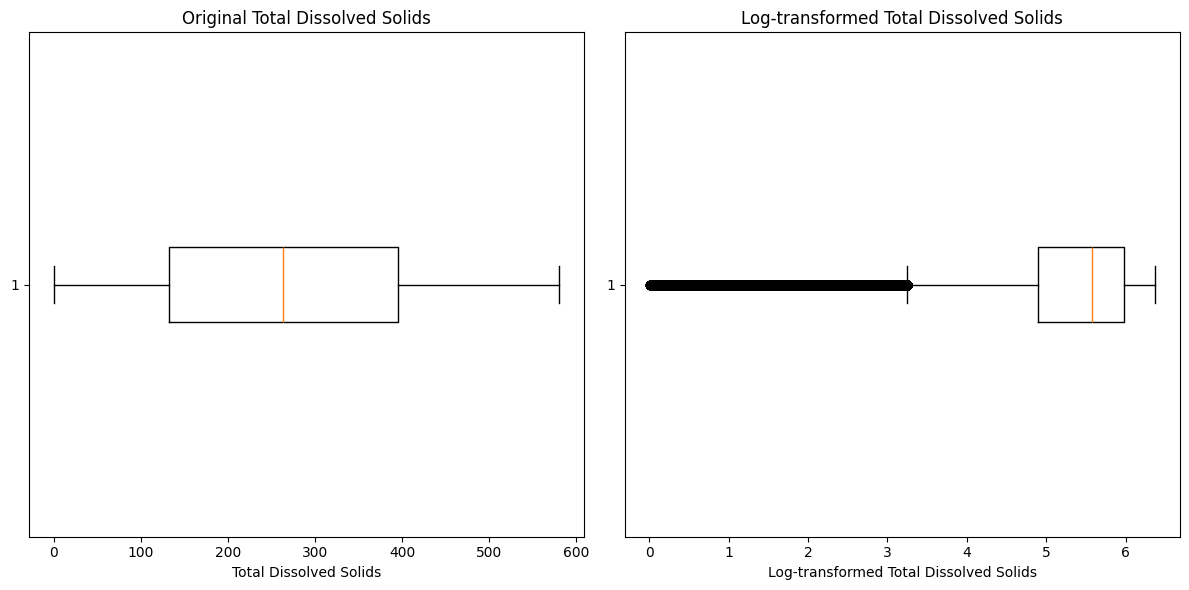

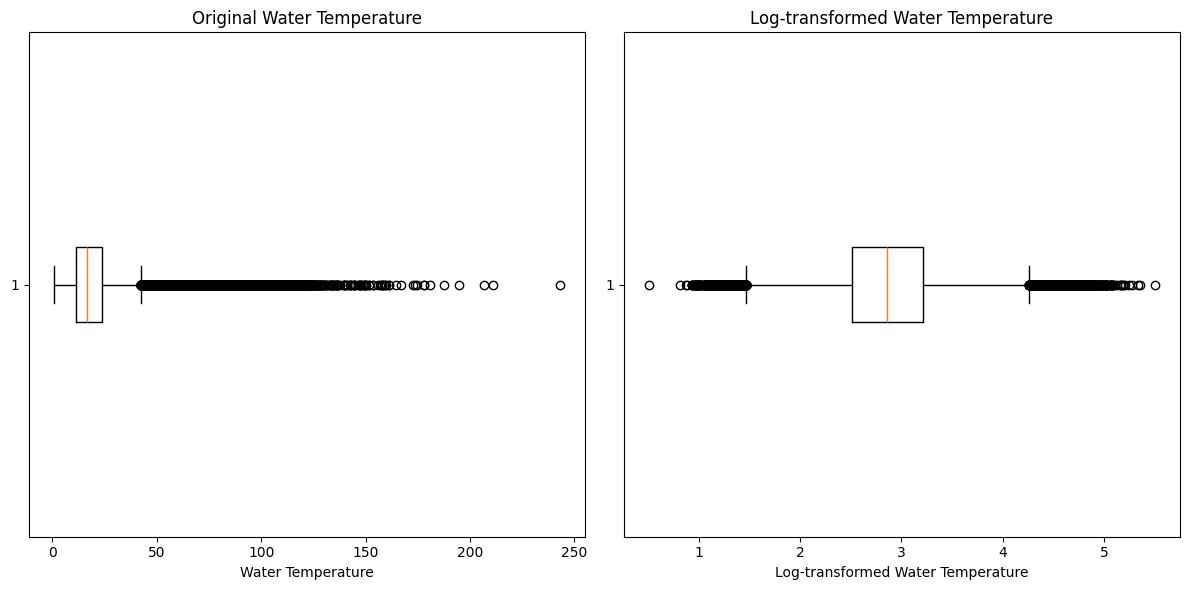

/Users/sebastienlee/Documents/school/2024/spring_2024/fundamentals_data_science/project-env/env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


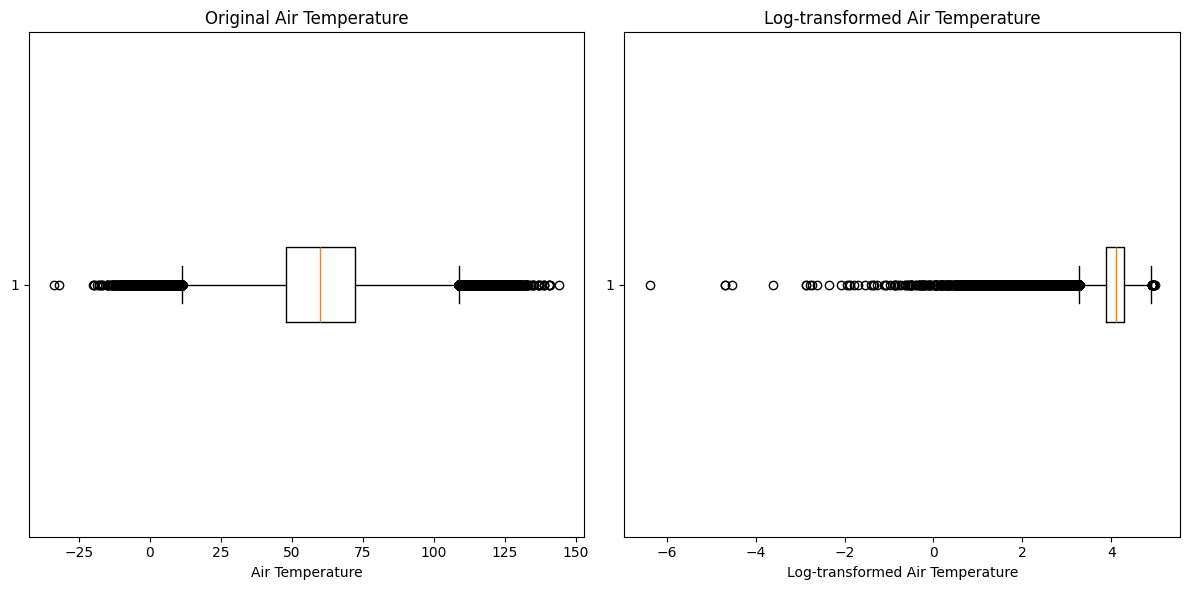

In [113]:
for feature in continuous_features:
    plt.figure(figsize=(12, 6))

    # Original data plot
    plt.subplot(1, 2, 1)
    plt.boxplot(outlier_copy[feature].dropna(), vert=False)  # Drop NA for valid boxplot
    plt.title(f'Original {feature}')
    plt.xlabel(feature)

    # Log-transformed data plot
    plt.subplot(1, 2, 2)
    transformed_data = np.log1p(outlier_copy[feature])  # Log-transform the feature
    plt.boxplot(transformed_data.dropna(), vert=False)  # Drop NA for valid boxplot
    plt.title(f'Log-transformed {feature}')
    plt.xlabel(f'Log-transformed {feature}')

    # Show the figure
    plt.tight_layout()  # Adjust layout for better readability
    plt.show()


### Outlier Removal

In [131]:
# Code here for whichever methods we choose for outlier removal
# Reassign df to be outlier removal dataframe

# After considering the different outlier removal techniques, we saw lead was extremely skewed and unhelpful for our model
# For this reason, we chose to drop lead and perform our outlier removal for the other features
# We also dropped index

# Do z-score for normal distributions
# Do log for all other distributions

df = df.drop(['Index', 'Lead'], axis=1)
df.info


<bound method DataFrame.info of                pH          Iron   Nitrate    Chloride      Zinc  \
0        8.332988  8.350000e-05  8.605777  122.799772  3.434827   
1        6.917863  8.050000e-05  3.734167  227.029851  1.245317   
2        5.443762  2.010586e-02  3.816994  230.995630  0.528280   
3        7.955339  1.439878e-01  8.224944  178.129940  4.027879   
4        8.091909  2.167128e-03  9.925788  186.540872  3.807511   
...           ...           ...       ...         ...       ...   
1048570  8.186428  1.977157e-02  5.968850  115.963429  2.277221   
1048571  8.046225  1.160000e-05  3.678714  148.053168  0.483369   
1048572  7.443582  3.103077e-03  7.893399  174.677900  1.461659   
1048573  6.897232  6.980000e-10  5.757980  125.564223  0.804589   
1048574  8.330849  2.996820e-04  2.360790  187.440277  1.157979   

                  Color  Turbidity  Fluoride    Copper      Odor  ...  \
0             Colorless   0.022683  0.607283  0.144599  1.626212  ...   
1          Faint 

# Missing Values

### Identify Missing Values

In [114]:
# Calculate missing values count and percentage for each feature
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame from the calculated series
missing_summary_df = pd.DataFrame({
    'Feature': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Missing Values (%)': missing_values_percentage.values
})

# Display the DataFrame
print(missing_summary_df)

                   Feature  Missing Values  Missing Values (%)
0                    Index               0            0.000000
1                       pH           20231            1.929380
2                     Iron            6991            0.666714
3                  Nitrate           18695            1.782896
4                 Chloride           30834            2.940562
5                     Lead            4684            0.446701
6                     Zinc           27675            2.639296
7                    Color             981            0.093556
8                Turbidity            8694            0.829125
9                 Fluoride           33218            3.167918
10                  Copper           34882            3.326610
11                    Odor           31332            2.988055
12                 Sulfate           34525            3.292564
13            Conductivity           28803            2.746871
14                Chlorine           10162            0

### Impute Missing Values

In [122]:
from sklearn.impute import SimpleImputer

def impute_missing_values(df):
    # Create imputers
    numerical_imputer = SimpleImputer(strategy='median')
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    
    # Impute missing values
    df[continuous_features] = numerical_imputer.fit_transform(df[continuous_features])
    df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])
    
    return df

# Impute missing values in the DataFrame & verify the changes
df_imputed = impute_missing_values(df.copy())
print(df_imputed.isnull().sum())

Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64


# Normalization

In [121]:
from sklearn.preprocessing import RobustScaler
# Initializes RobustScaler
scaler = RobustScaler()

# Makes copy of df
normalized_df = df_imputed.copy()

# Robust scaling of all continuous features
for feature in continuous_features:
    column_data = normalized_df[[feature]]
    scaled_data = scaler.fit_transform(column_data)
    normalized_df[feature] = scaled_data

print(normalized_df.head(20))

    Index        pH       Iron   Nitrate  Chloride          Lead      Zinc  \
0       0  0.827336  -0.040289  0.854979 -0.687291  3.710000e-52  1.353405   
1       1 -0.503028  -0.040350 -0.514687  0.691747 -1.520000e-62  0.097786   
2       2 -1.888834   0.369056 -0.491400  0.744217 -1.520000e-62 -0.313413   
3       3  0.472306   2.901748  0.747907  0.044766 -1.520000e-62  1.693503   
4       4  0.600696   0.002310  1.226104  0.156049 -1.520000e-62  1.567128   
5       5  0.000000  -0.041864 -1.085871 -0.157683  6.100000e-23  1.529825   
6       6  0.638814   1.087808 -0.358972 -1.055182  2.920000e-52  0.398803   
7       7 -0.183073  -0.041996  1.039387  0.099176 -1.520000e-62 -0.377528   
8       8  0.738176  -0.041996 -0.667011 -0.417081  1.839985e-57 -0.539308   
9       9 -0.331189   0.019727 -0.546605 -0.234217 -1.520000e-62 -0.551567   
10     10 -0.258533   2.253131  0.959807  0.839238  2.290000e-34  0.838412   
11     11  0.332556  -0.041996  0.899381 -1.131137  1.360000e-46

# Random Sampling

In [124]:
df_sampled = df.sample(frac=0.5, random_state=42)
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524288 entries, 781974 to 87439
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   524288 non-null  int64  
 1   pH                      514097 non-null  float64
 2   Iron                    520791 non-null  float64
 3   Nitrate                 514959 non-null  float64
 4   Chloride                508885 non-null  float64
 5   Lead                    521956 non-null  float64
 6   Zinc                    510366 non-null  float64
 7   Color                   523803 non-null  object 
 8   Turbidity               519994 non-null  float64
 9   Fluoride                507714 non-null  float64
 10  Copper                  506759 non-null  float64
 11  Odor                    508547 non-null  float64
 12  Sulfate                 507196 non-null  float64
 13  Conductivity            509842 non-null  float64
 14  Chlorine             